In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from xgboost.sklearn import XGBClassifier

warnings.filterwarnings('ignore')

%matplotlib inline

np.random.seed(13)

In [2]:
sns.set(rc={'figure.figsize':(15,11)})

In [3]:
plt.rcParams['figure.figsize'] = (15,11)

In [4]:
data = pd.read_csv('data.csv')

In [5]:
X = data.drop('Label', axis=1)
y = data['Label']

In [6]:
if data.isnull().any().any():
    print('Found missing values in data')
else:
    print('No missing values in data')

No missing values in data


In [7]:
print(X.shape)

(1000, 70)


In [8]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 70 columns):
totalWordsCount              1000 non-null int64
semanticobjscore             1000 non-null int64
semanticsubjscore            1000 non-null int64
CC                           1000 non-null int64
CD                           1000 non-null int64
DT                           1000 non-null int64
EX                           1000 non-null int64
FW                           1000 non-null int64
INs                          1000 non-null int64
JJ                           1000 non-null int64
JJR                          1000 non-null int64
JJS                          1000 non-null int64
LS                           1000 non-null int64
MD                           1000 non-null int64
NN                           1000 non-null int64
NNP                          1000 non-null int64
NNPS                         1000 non-null int64
NNS                          1000 non-null int64
PDT         

In [9]:
X.head()

,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,FW,INs,JJ,...,sentences,unique_words_count,unique_words_share,word_average_len,stopwords_count,stopwords_share,polarity_raw,polarity_preprocessed,subjectivity,subjectivity_preprocessed
0,109,0,1,7,9,0,5,8,6,0,...,4,48,0.857143,4.829545,32,0.293578,0.300000,0.114286,0.316667,0.309524
1,309,21,4,1,19,1,4,35,23,0,...,13,166,0.718615,4.554726,171,0.553398,-0.040972,-0.037281,0.357222,0.380702
2,149,6,1,8,14,0,5,15,11,0,...,7,67,0.797619,4.643411,45,0.302013,0.263889,0.365000,0.596825,0.588333
3,305,18,5,7,26,0,10,37,21,1,...,14,137,0.752747,5.058621,108,0.354098,0.055769,0.030952,0.371795,0.367460
4,491,23,8,33,47,0,12,61,36,0,...,19,191,0.667832,4.650000,174,0.354379,0.215831,0.186684,0.401348,0.345546


In [10]:
X.describe()

,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,FW,INs,JJ,...,sentences,unique_words_count,unique_words_share,word_average_len,stopwords_count,stopwords_share,polarity_raw,polarity_preprocessed,subjectivity,subjectivity_preprocessed
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,697.120000,39.005000,13.934000,20.626000,66.452000,1.054000,11.477000,75.151000,47.432000,2.152000,...,23.790000,223.953000,0.661310,4.496692,272.577000,0.615640,0.122763,0.104016,0.427273,0.388093
std,523.340997,32.134835,13.617528,22.765773,52.045407,1.663084,12.690174,55.927293,38.373218,2.858158,...,18.143458,133.281915,0.103228,0.260122,191.874073,0.787834,0.083689,0.099773,0.081025,0.080059
min,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,...,2.000000,23.000000,0.366197,3.872727,10.000000,0.010811,-0.232918,-0.260000,0.000000,0.000000
25%,272.000000,13.000000,4.000000,7.000000,24.750000,0.000000,3.000000,31.750000,19.000000,0.000000,...,12.000000,119.750000,0.585452,4.313925,119.750000,0.272898,0.069150,0.038056,0.383139,0.341262
50%,626.000000,33.000000,10.000000,14.000000,58.000000,0.000000,8.000000,67.000000,40.000000,1.000000,...,20.000000,213.000000,0.651248,4.468552,246.500000,0.392886,0.121238,0.098094,0.435447,0.390775
75%,953.250000,56.000000,20.250000,26.250000,93.000000,1.000000,15.000000,103.000000,65.000000,3.000000,...,30.000000,299.000000,0.724751,4.653498,382.250000,0.607200,0.176210,0.164972,0.478402,0.437029
max,4283.000000,237.000000,97.000000,225.000000,471.000000,12.000000,96.000000,473.000000,354.000000,26.000000,...,175.000000,975.000000,1.000000,5.619048,1705.000000,8.144578,0.483333,0.510000,0.703491,0.684874


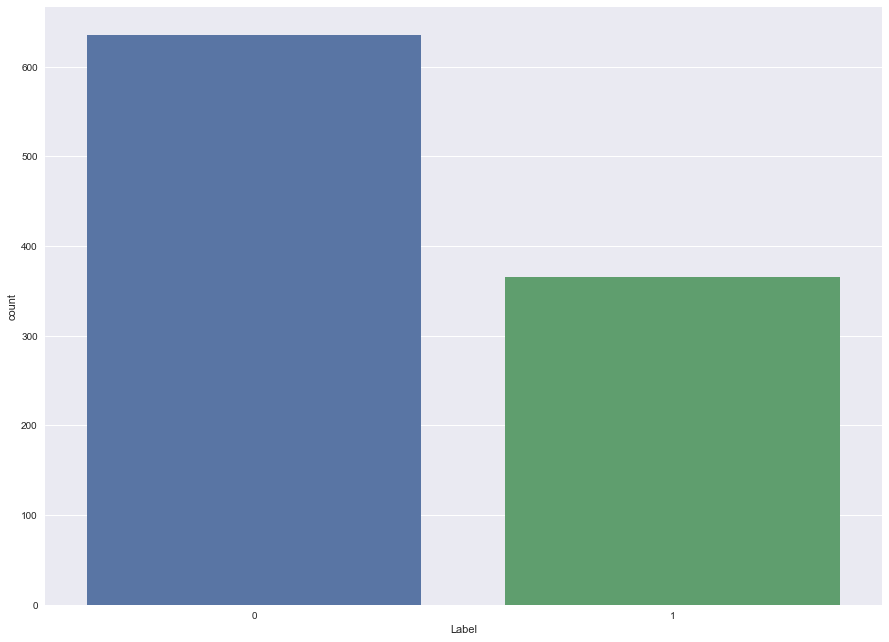

In [11]:
sns.countplot(x='Label', data=data);

According to the description of the dataset, almost all the features are numerical:

In [12]:
numerical_feats = X.drop(['sentence1st', 'sentencelast'], axis=1).columns

There are only two binary:

In [13]:
X['sentence1st'].value_counts()

1    927
0     73
Name: sentence1st, dtype: int64

In [14]:
X['sentencelast'].value_counts()

1    995
0      5
Name: sentencelast, dtype: int64

# Cleaning

### Low variance

Exclude features with low variance. To do this, let's scale the data first (and split the data to train and test right away):

In [15]:
sc = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, stratify=y)
X_train.loc[:, numerical_feats] = sc.fit_transform(X_train[numerical_feats])
X_test.loc[:, numerical_feats] = sc.transform(X_test[numerical_feats])

The features with the lowest variances:

In [16]:
feature_variance = X_train.var().sort_values()
feature_variance[:10]

WRB                 0.000000
NNP                 0.000000
ellipsis            0.000000
sentencelast        0.002663
JJS                 0.002814
colon               0.006744
semicolon           0.006916
pronouns1st         0.007173
TOs                 0.009206
exclamationmarks    0.010101
dtype: float64

Based on this, we can drop the features with variance less than some threshold $k$. We chose $k = 0.005$, because five features with variance below this threshold are constant or almost constant, but it seems that the next feature ('colon') may carry some useful information.

In [17]:
X_train['WRB'].value_counts()

0.0    750
Name: WRB, dtype: int64

In [18]:
X_train['NNP'].value_counts()

0.0    750
Name: NNP, dtype: int64

In [19]:
X_train['ellipsis'].value_counts()

0.0    750
Name: ellipsis, dtype: int64

In [20]:
X_train['sentencelast'].value_counts()

1    748
0      2
Name: sentencelast, dtype: int64

In [21]:
X_train['JJS'].value_counts()

0.0    744
0.2      3
0.6      1
0.8      1
1.0      1
Name: JJS, dtype: int64

In [22]:
X_train['colon'].value_counts()

0.000000    349
0.026316    169
0.052632     80
0.078947     51
0.105263     32
0.131579     20
0.157895     13
0.184211      8
0.236842      7
0.210526      7
0.315789      3
0.289474      2
0.605263      1
0.421053      1
0.368421      1
0.710526      1
0.394737      1
0.263158      1
0.868421      1
0.342105      1
1.000000      1
Name: colon, dtype: int64

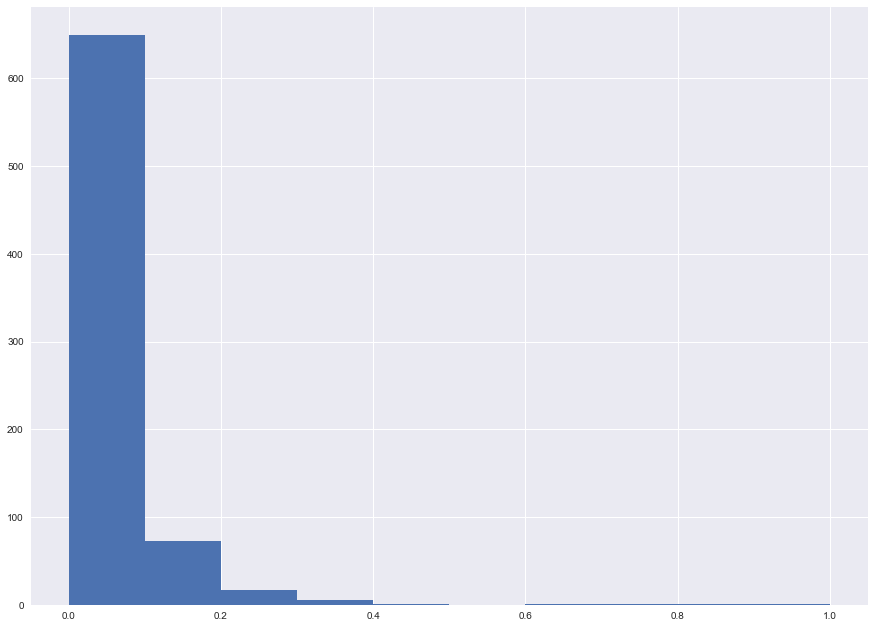

In [23]:
X_train['colon'].hist();

In [24]:
low_var_features = ['WRB', 'NNP', 'ellipsis', 'sentencelast', 'JJS']

In [25]:
X_train.drop(low_var_features, axis=1, inplace=True)
X_test.drop(low_var_features, axis=1, inplace=True)

### High correlation

Also we can exclude features that are linearly dependent. Let's show correlation matrix:

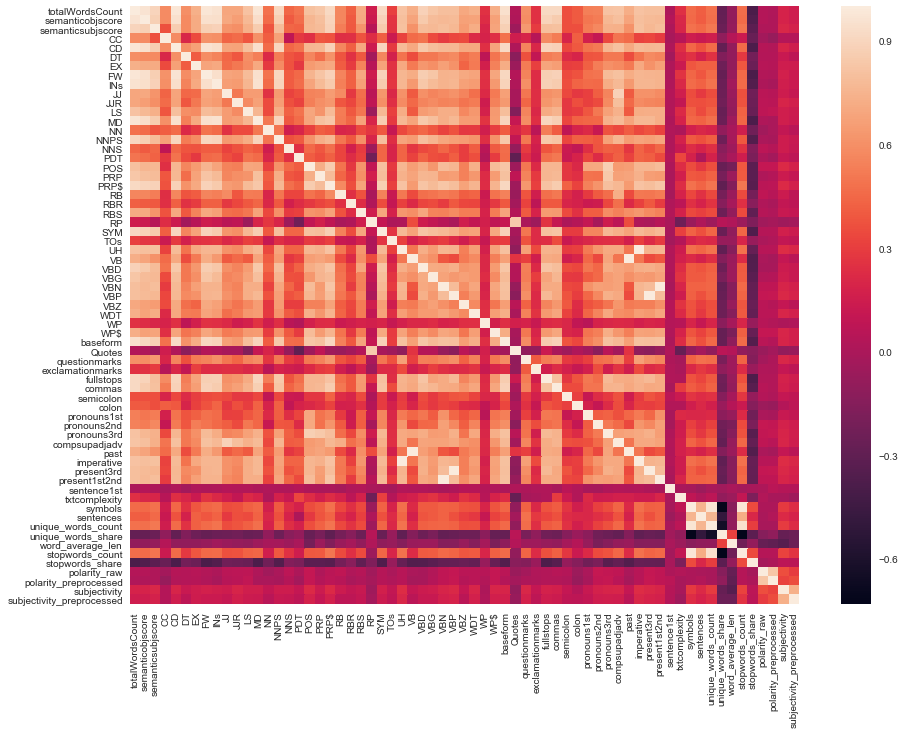

In [26]:
sns.heatmap(X_train.corr(), xticklabels=X_train.corr().columns, yticklabels=X_train.corr().columns)
plt.show()

Let's go deeper in the details and show the pairs of features (including with themselves) with the highest correlation:

In [27]:
corr_series = X_train.corr(method='pearson').abs().unstack().sort_values(ascending=False)

In [28]:
corr_series[:60]

subjectivity_preprocessed  subjectivity_preprocessed    1.0
fullstops                  fullstops                    1.0
pronouns3rd                pronouns3rd                  1.0
pronouns2nd                pronouns2nd                  1.0
pronouns1st                pronouns1st                  1.0
colon                      colon                        1.0
semicolon                  semicolon                    1.0
commas                     commas                       1.0
exclamationmarks           exclamationmarks             1.0
past                       VB                           1.0
questionmarks              questionmarks                1.0
Quotes                     Quotes                       1.0
baseform                   baseform                     1.0
WP$                        WP$                          1.0
WP                         WP                           1.0
WDT                        WDT                          1.0
compsupadjadv              compsupadjadv

In [29]:
corr_series[60:75]

RP               RP                 1.000000
SYM              SYM                1.000000
TOs              TOs                1.000000
UH               UH                 1.000000
                 imperative         1.000000
VB               VB                 1.000000
                 past               1.000000
VBD              VBD                1.000000
VBG              VBG                1.000000
polarity_raw     polarity_raw       1.000000
VBZ              VBZ                1.000000
totalWordsCount  totalWordsCount    1.000000
subjectivity     subjectivity       1.000000
FW               totalWordsCount    0.978545
totalWordsCount  FW                 0.978545
dtype: float64

As we can see, there are some features which are linearly dependent (correlation = 1). Let's exclude one from each pair.

In [30]:
high_corr_features = ['VB', 'UH', 'VBN', 'VBP']

In [31]:
X_train.drop(high_corr_features, axis=1, inplace=True)
X_test.drop(high_corr_features, axis=1, inplace=True)

In [32]:
X_train.shape, X_test.shape

((750, 61), (250, 61))

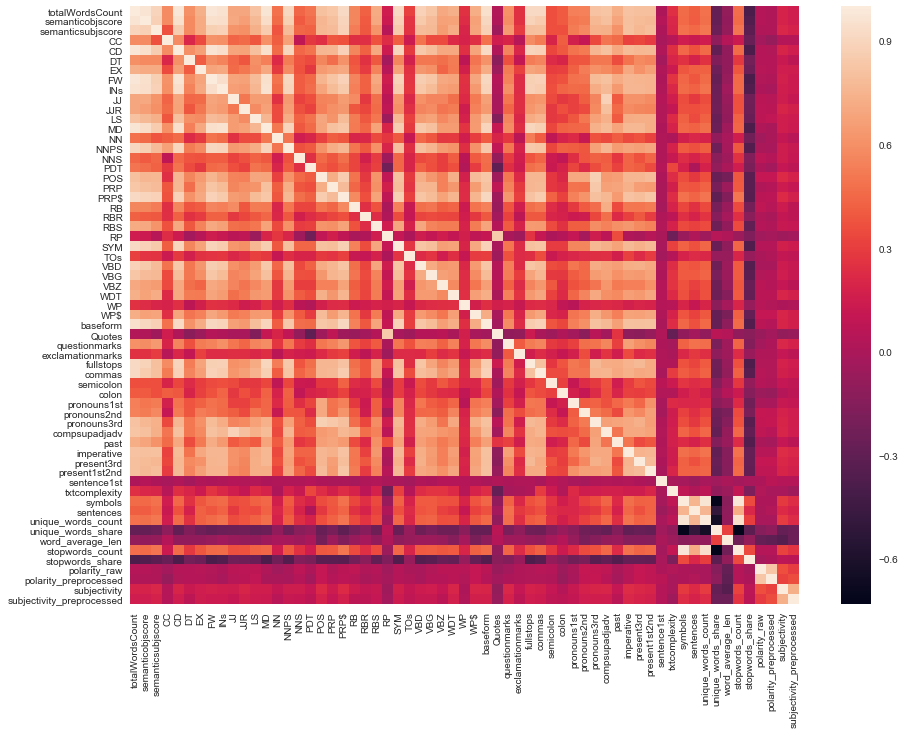

In [33]:
sns.heatmap(X_train.corr(), xticklabels=X_train.corr().columns, yticklabels=X_train.corr().columns)
plt.show()

Finally, let's show feature distribution and notice that some of the features (CC, txtcomplexity) do not provide the information based on which the data may be easy distinguishable, but, however, some of them (totalWordsCount, semanticobjscore) provide, so the task is solveable - we don't have to do some complex feature transformations.

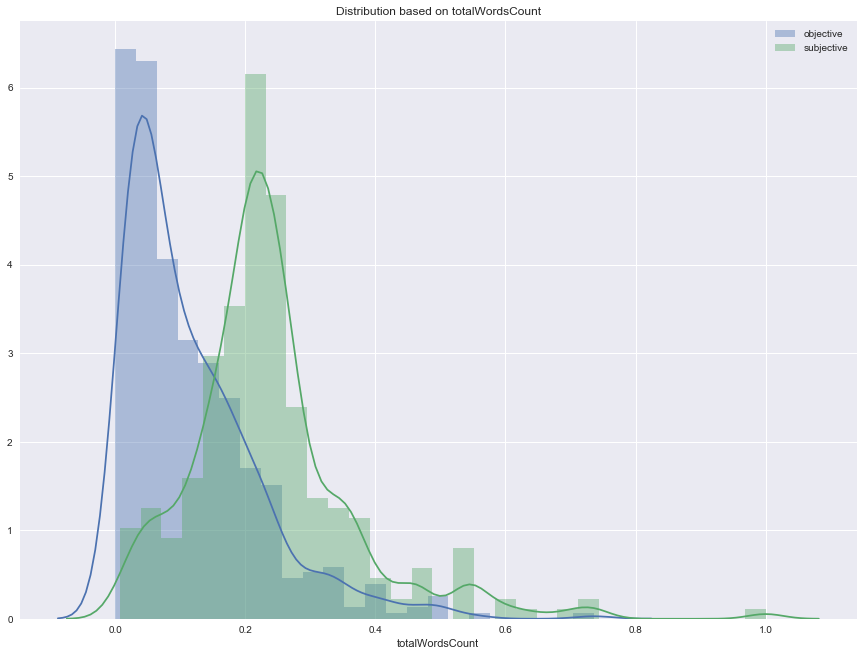

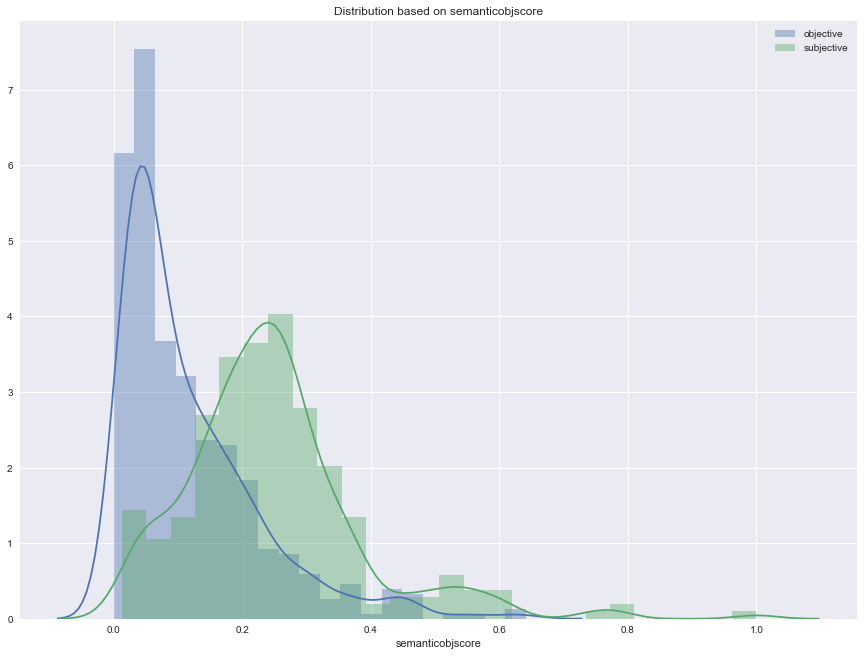

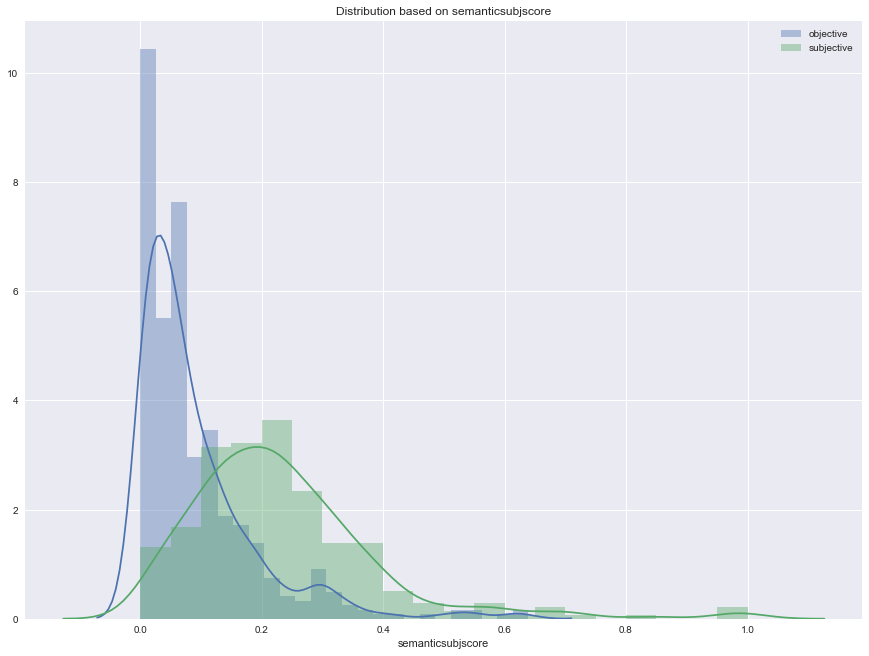

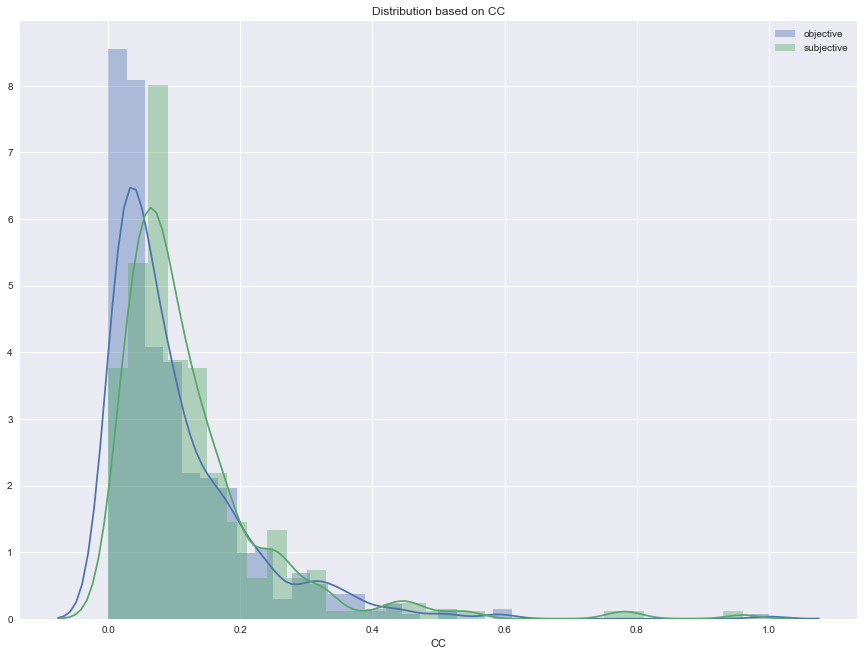

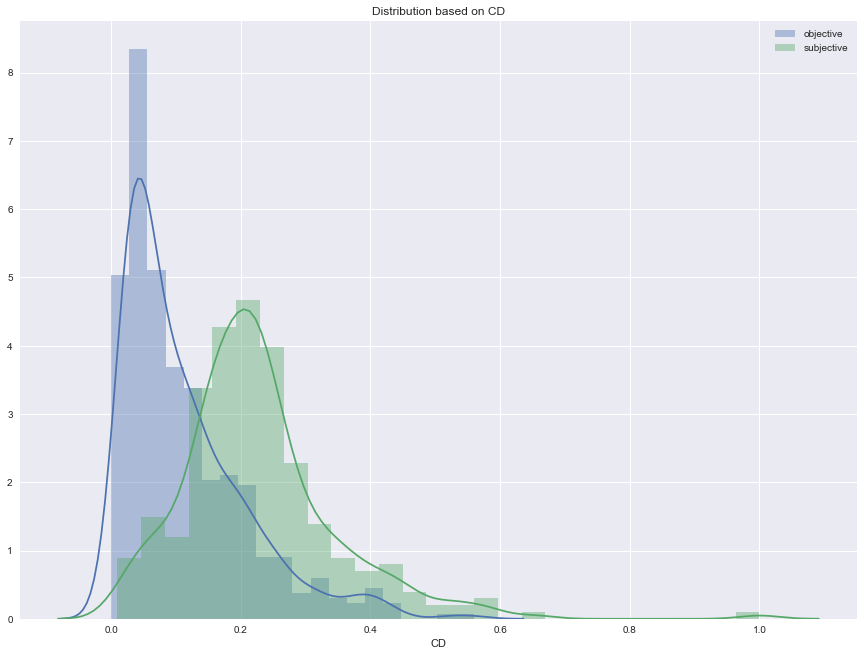

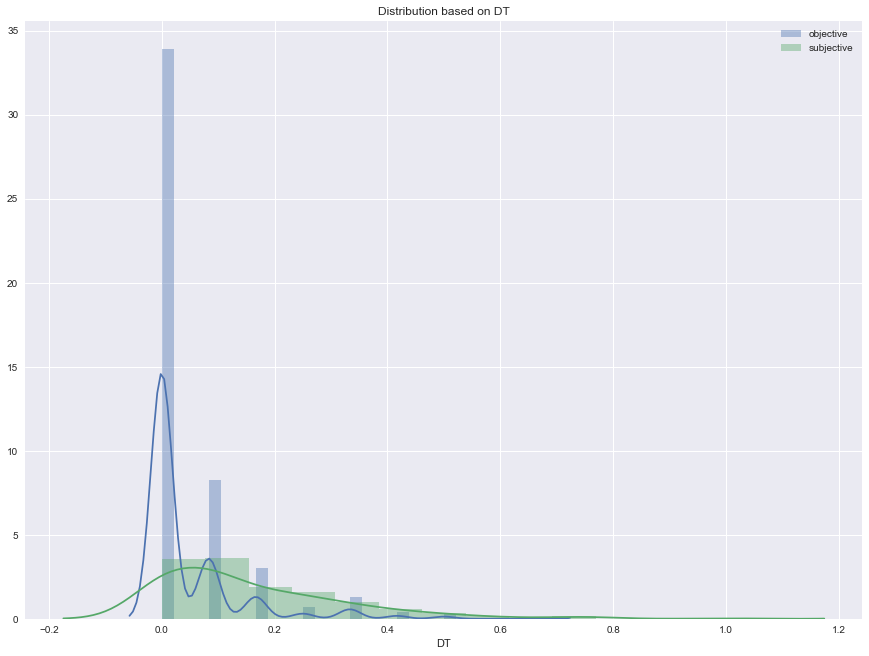

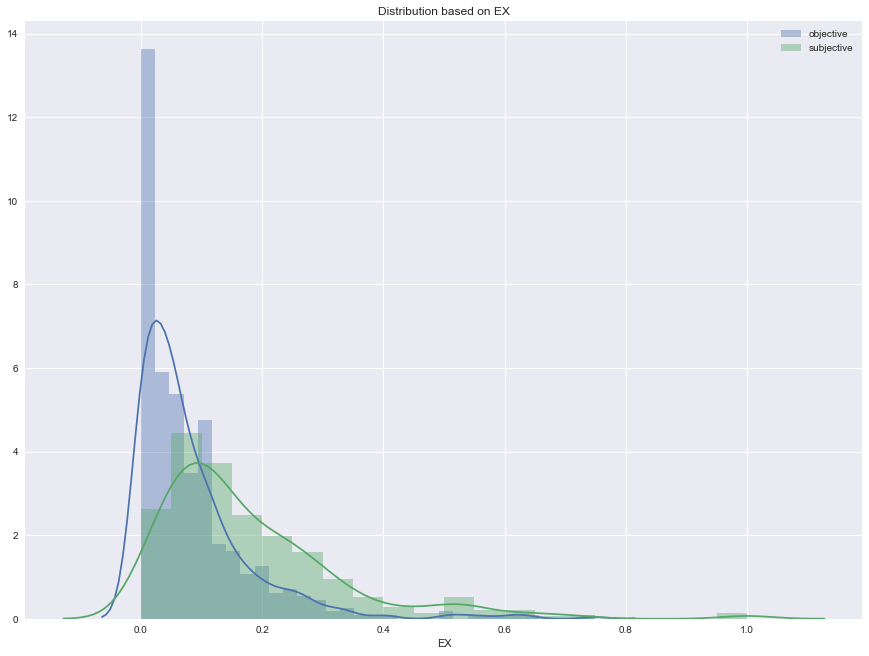

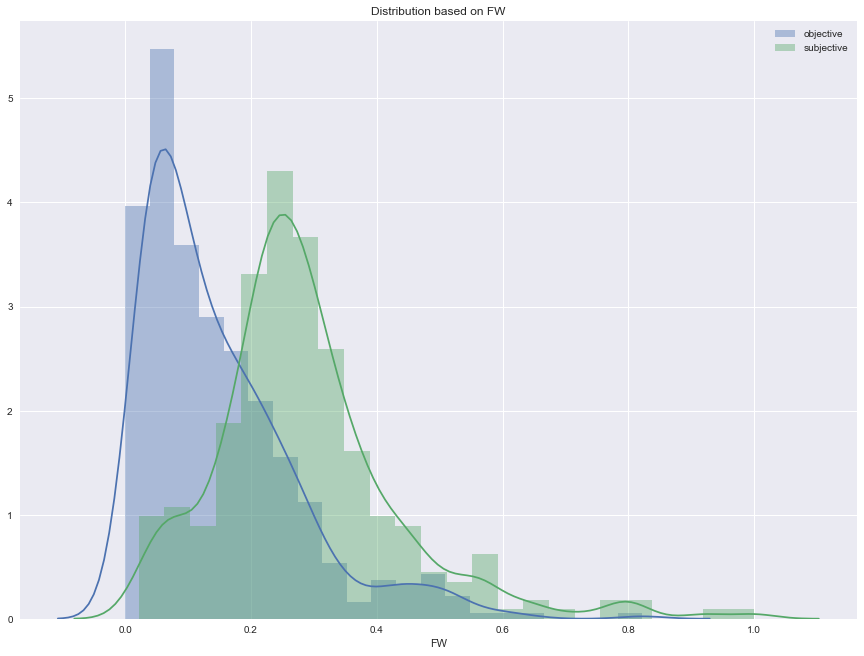

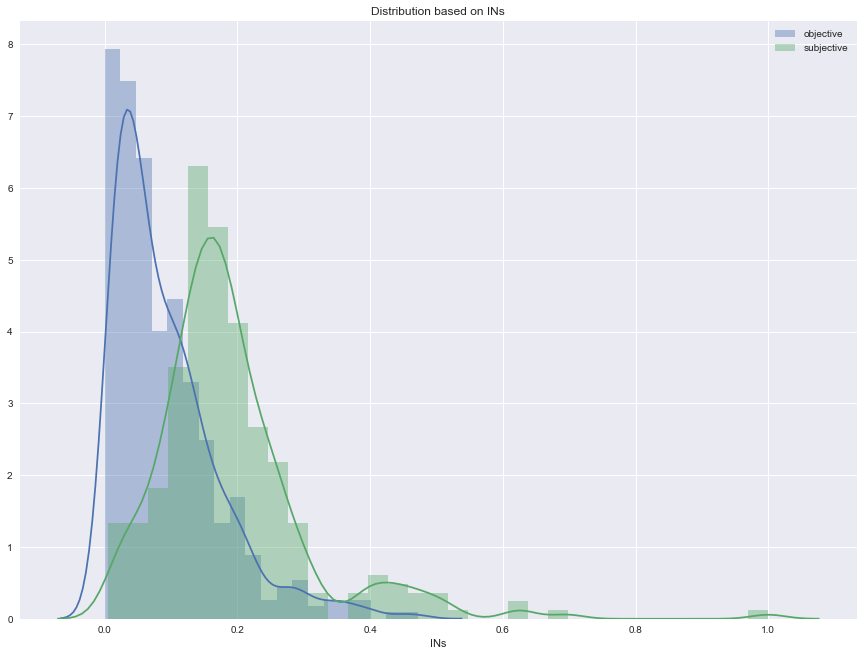

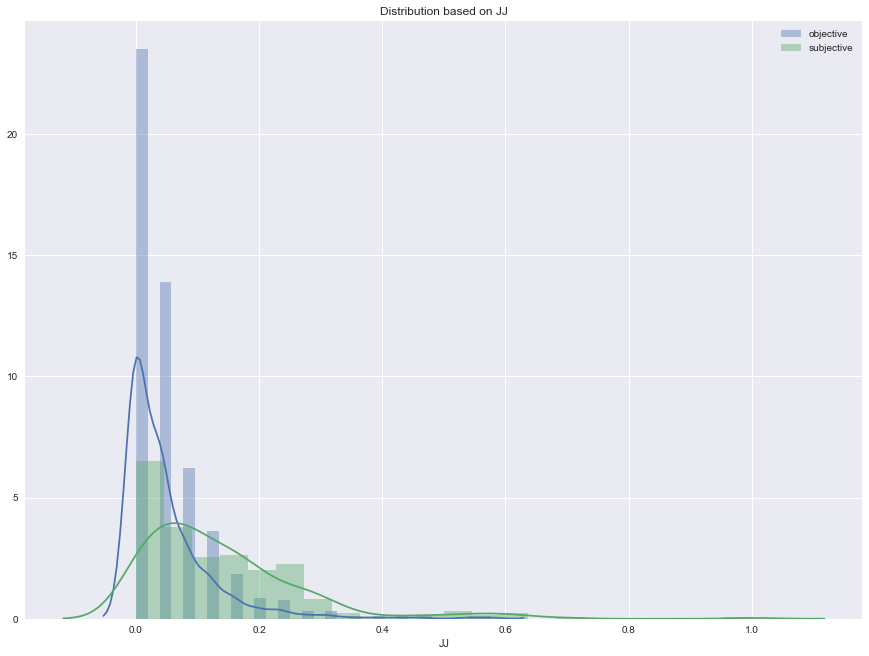

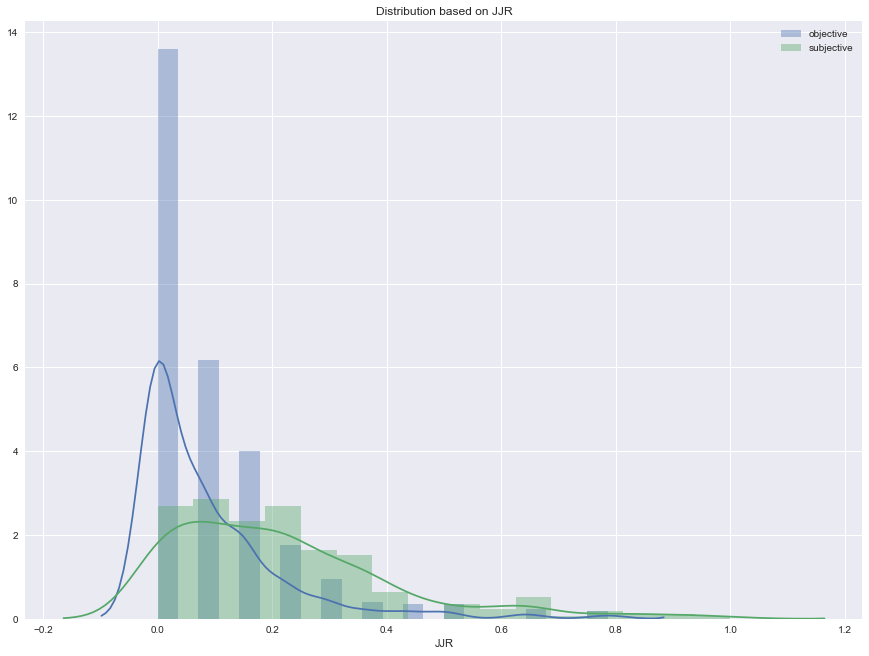

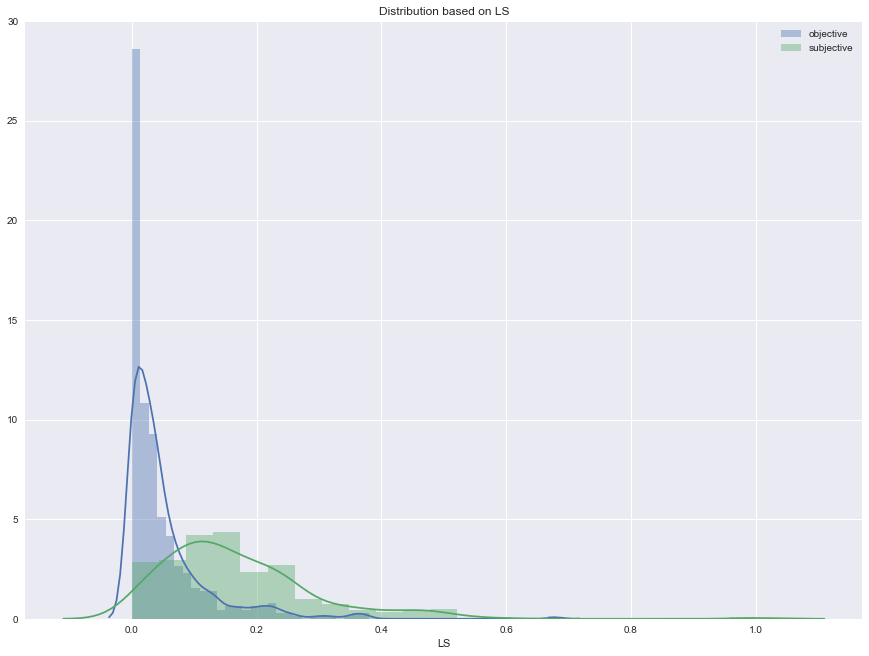

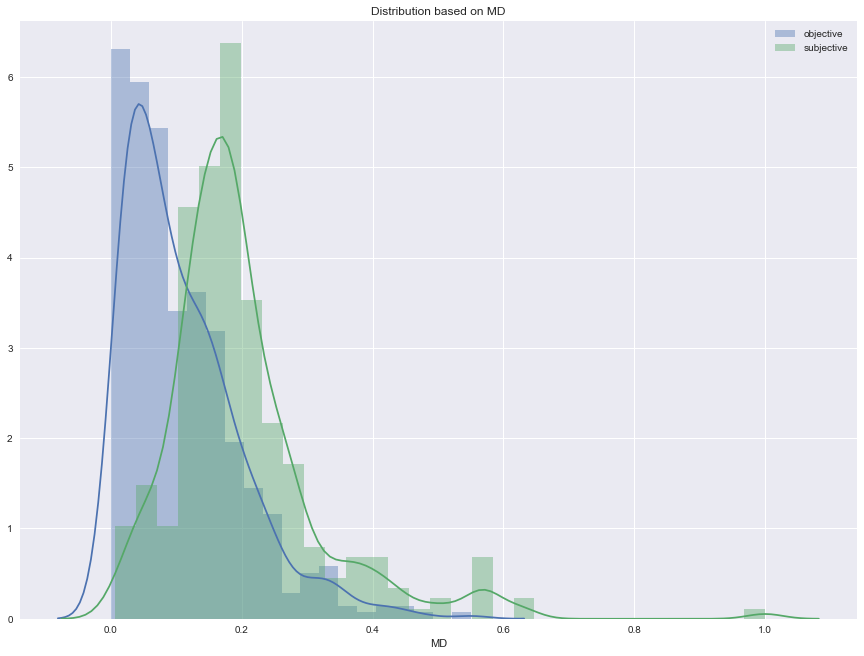

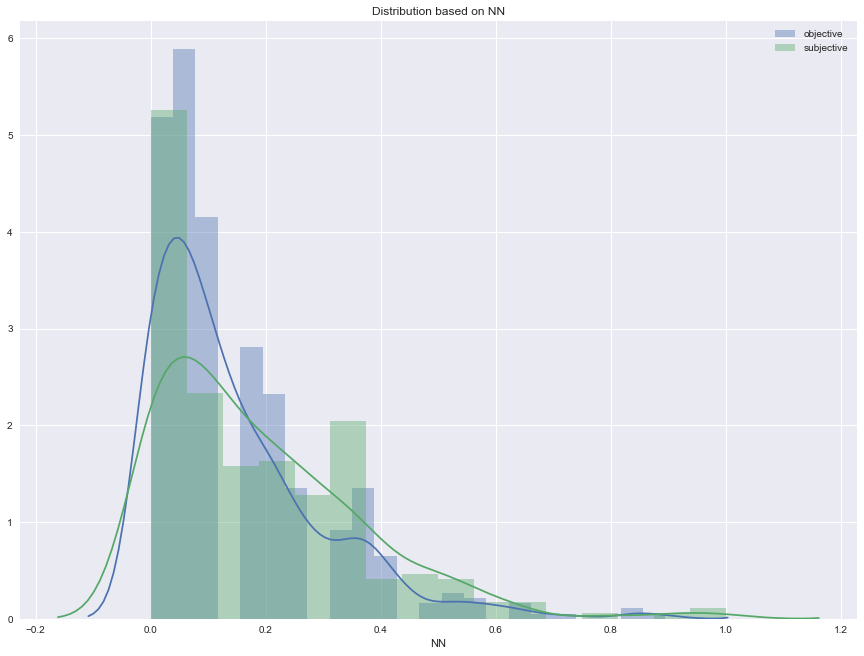

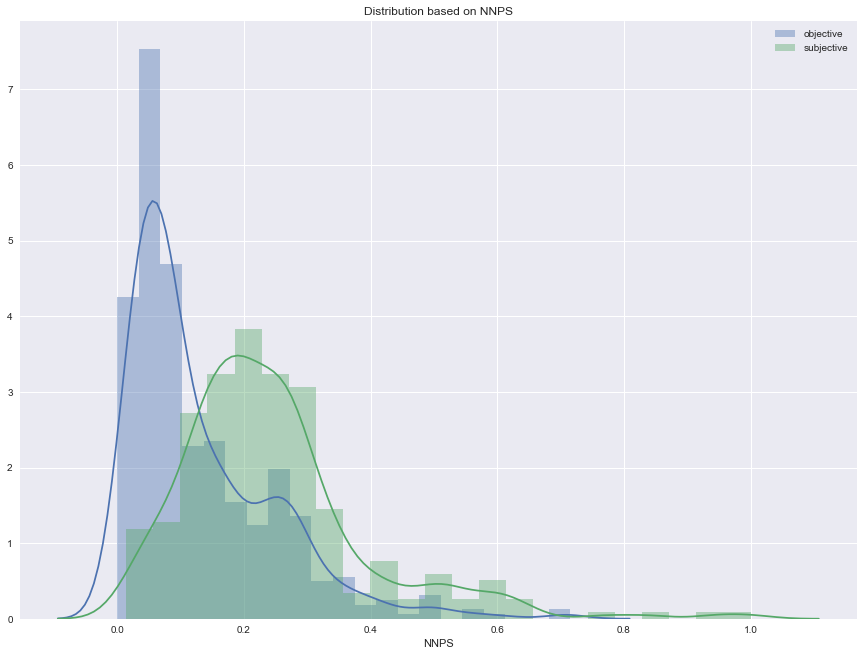

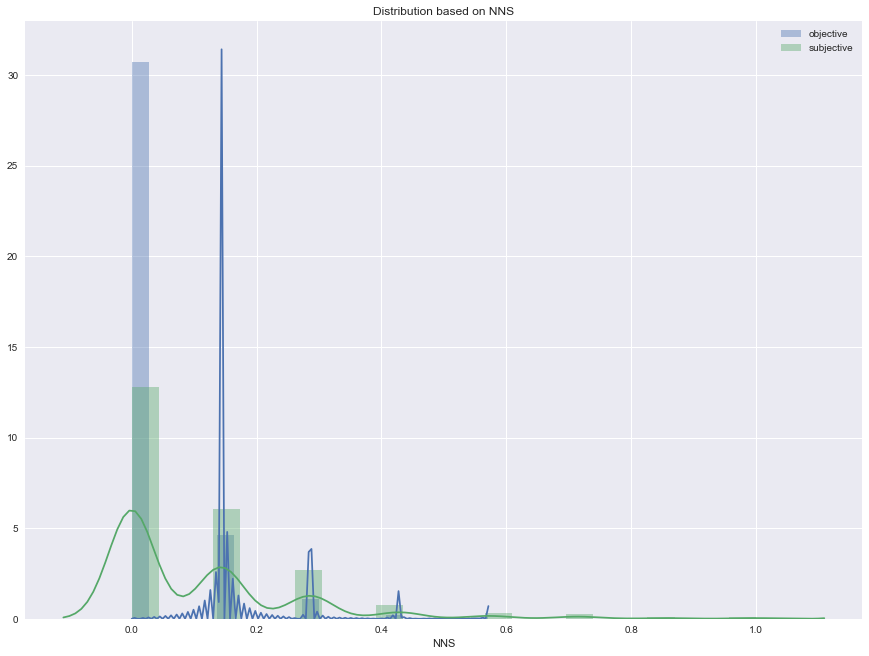

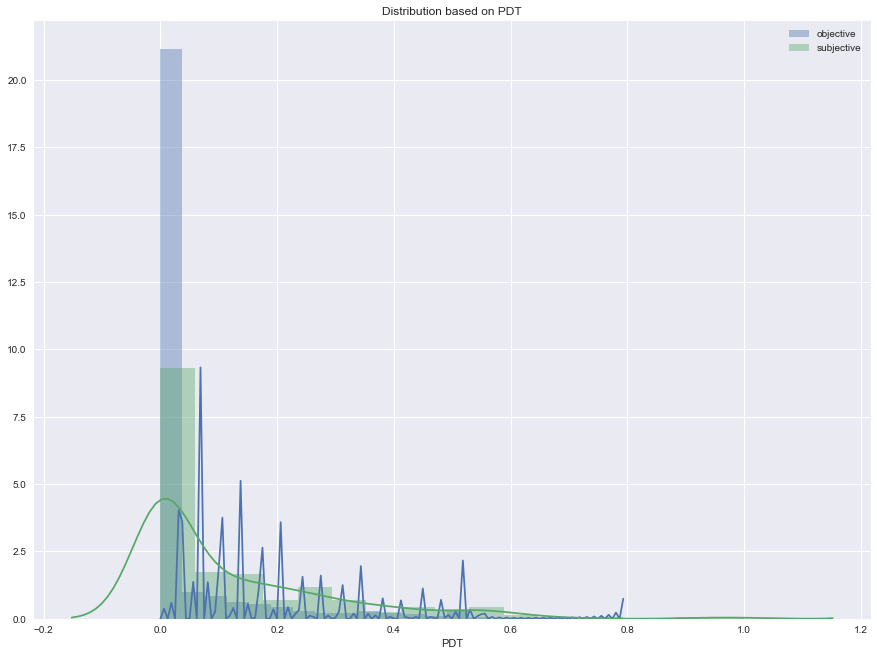

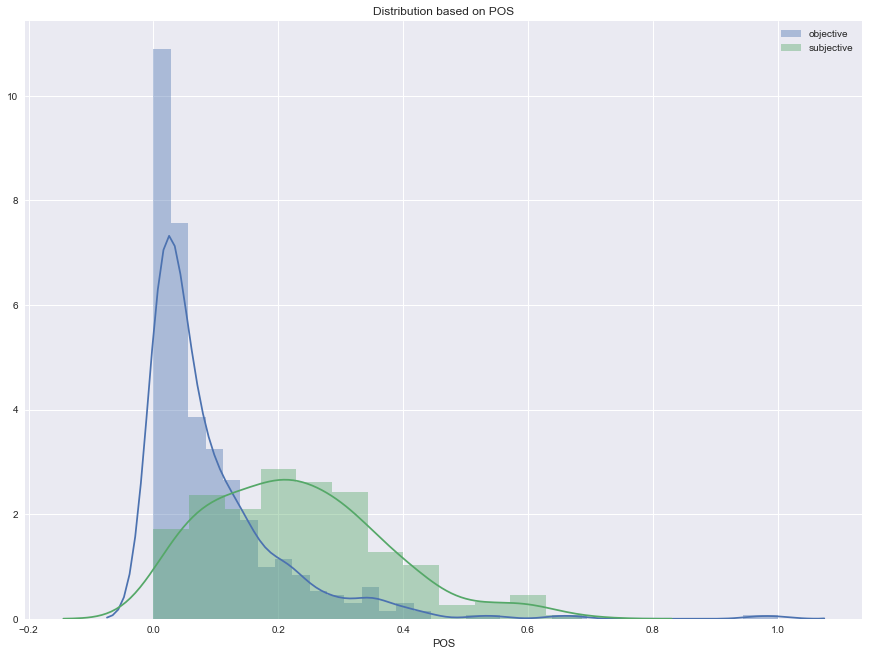

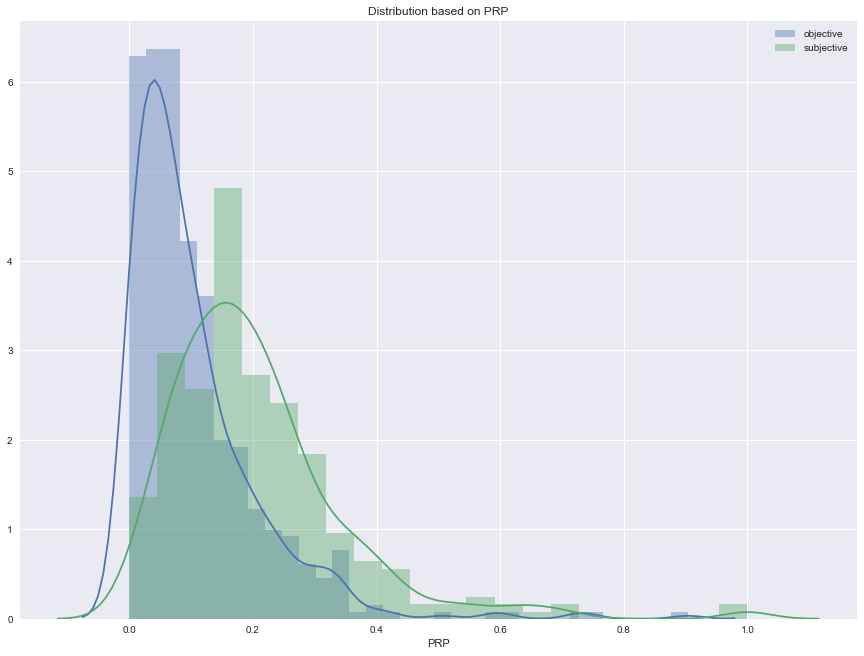

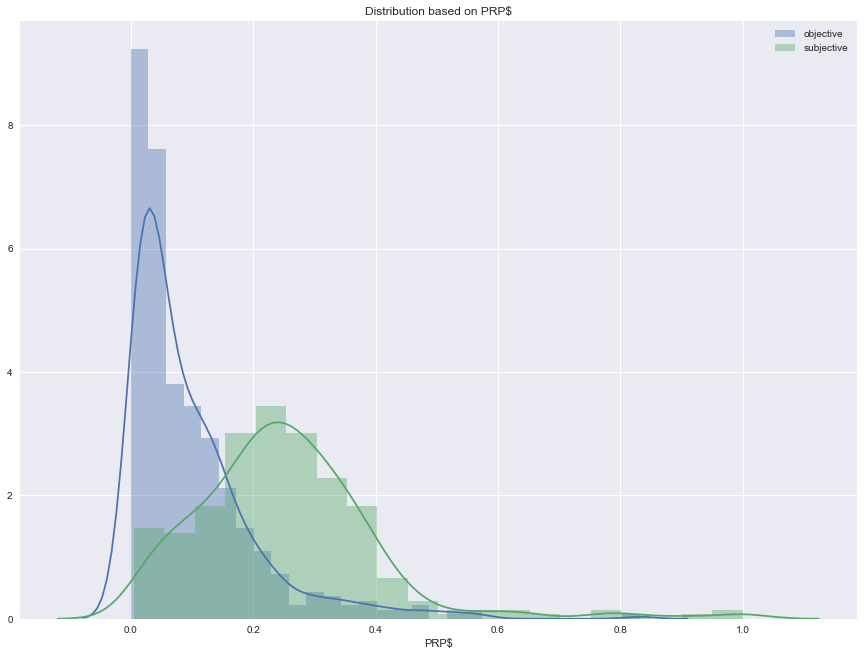

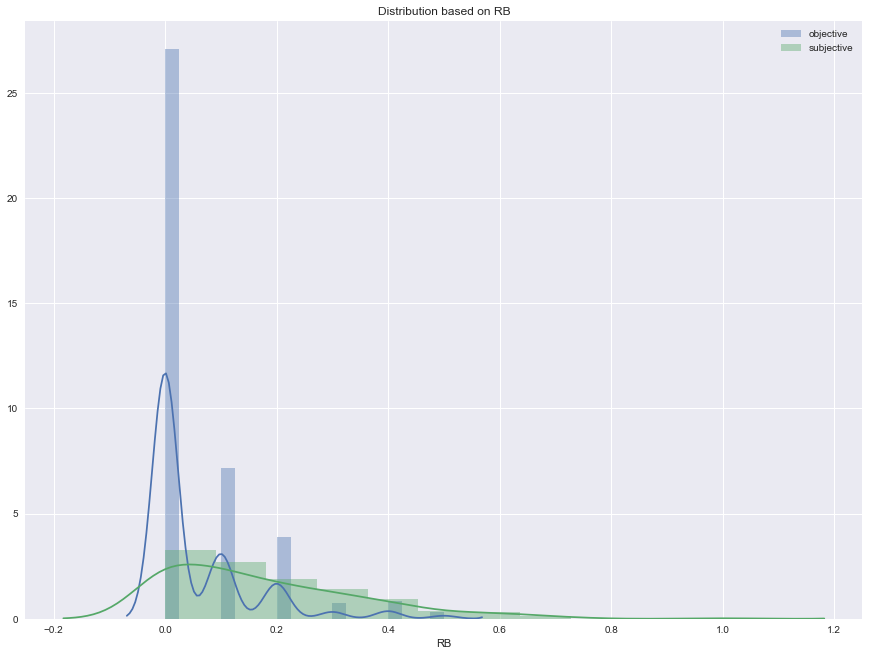

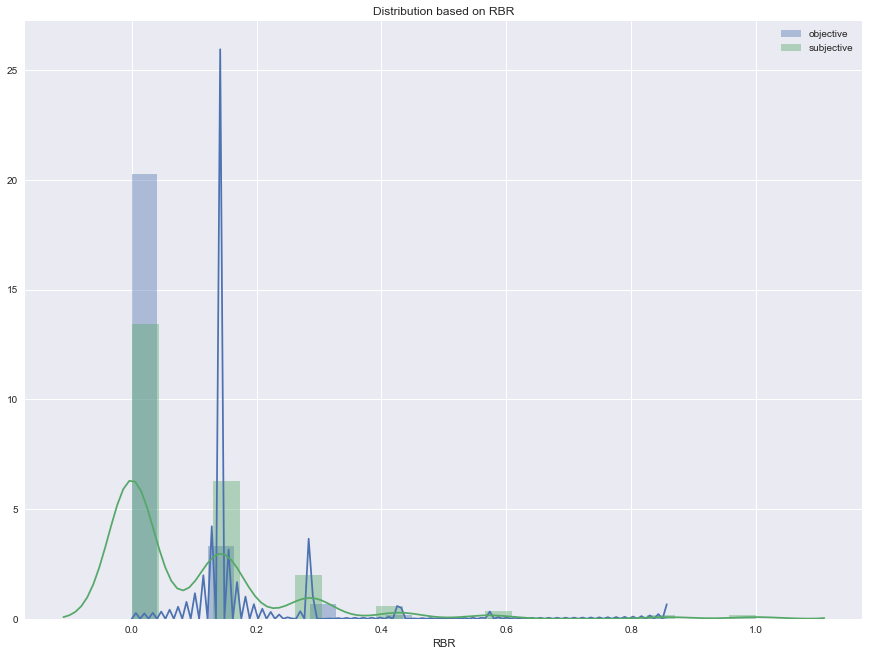

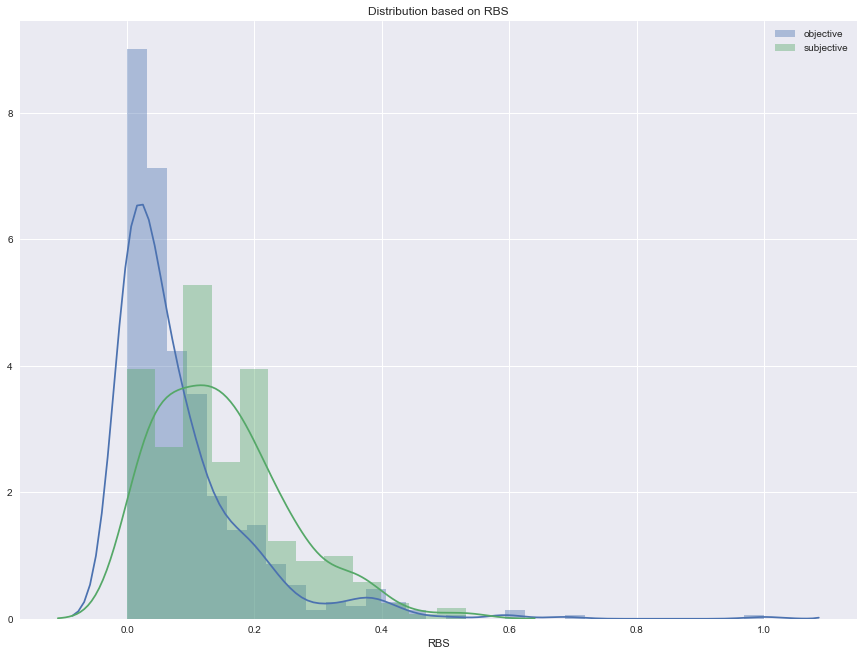

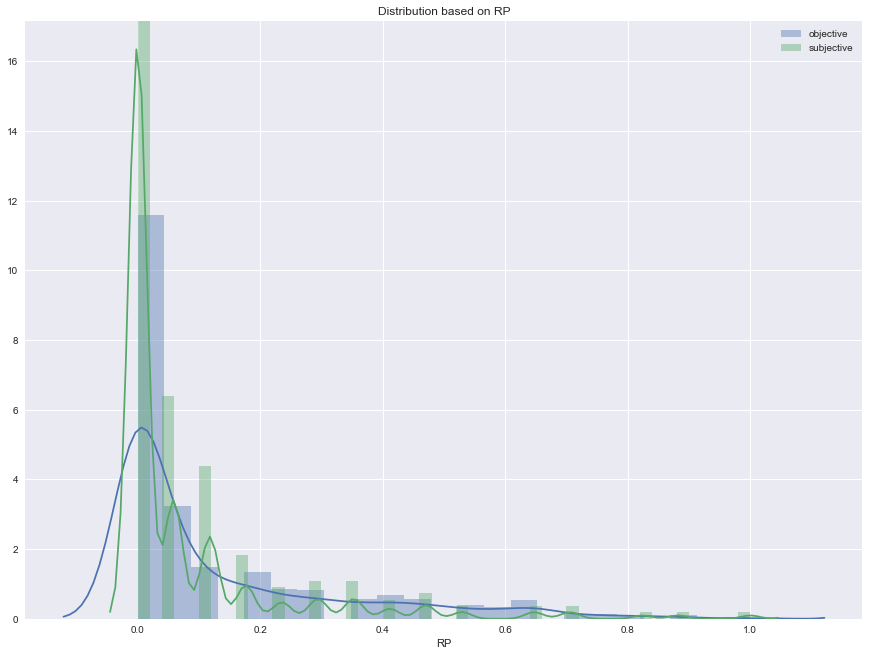

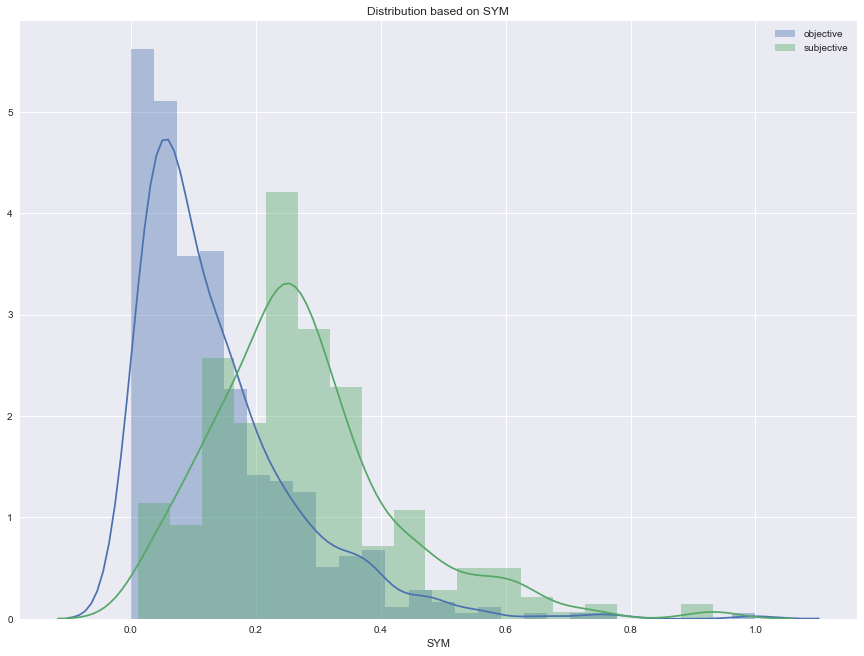

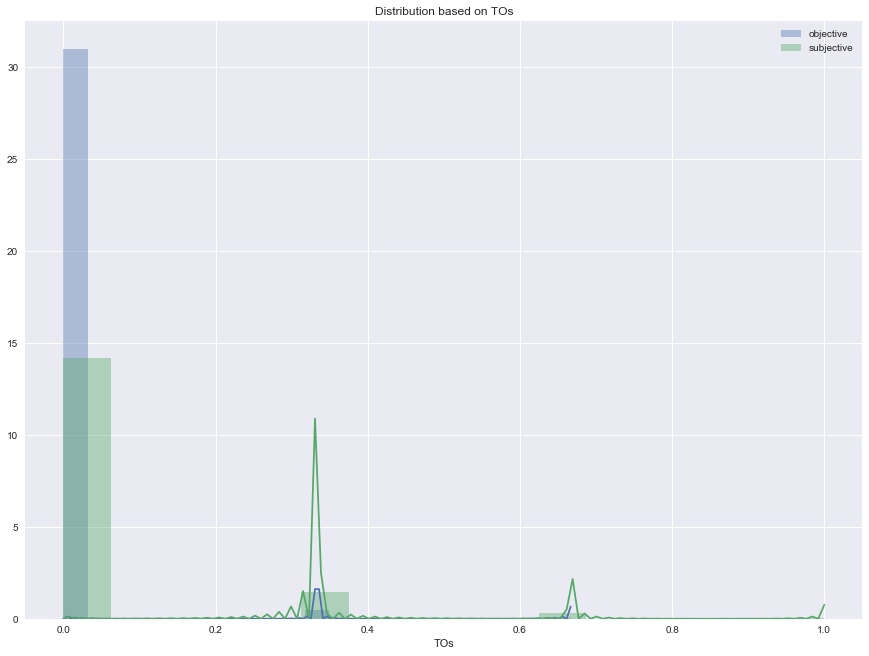

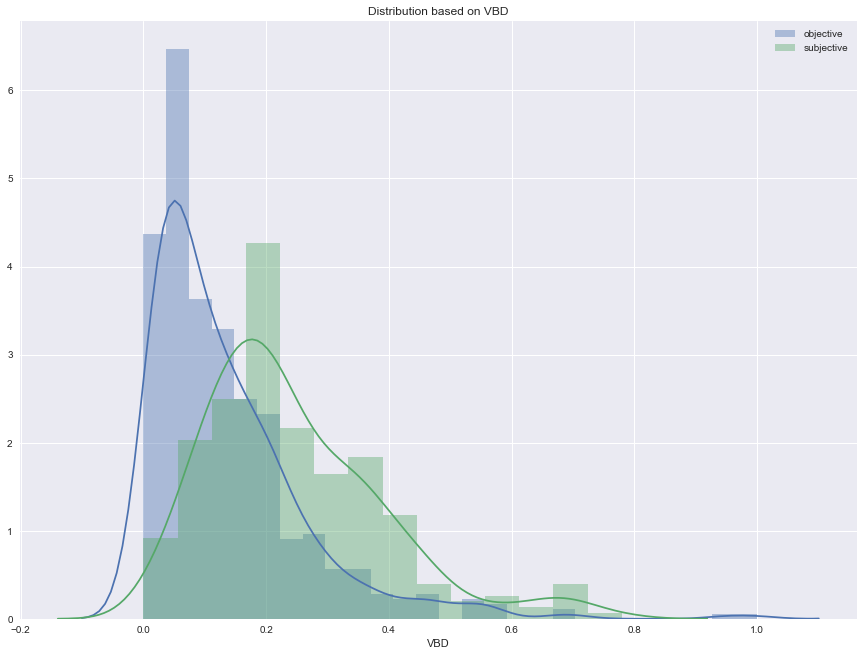

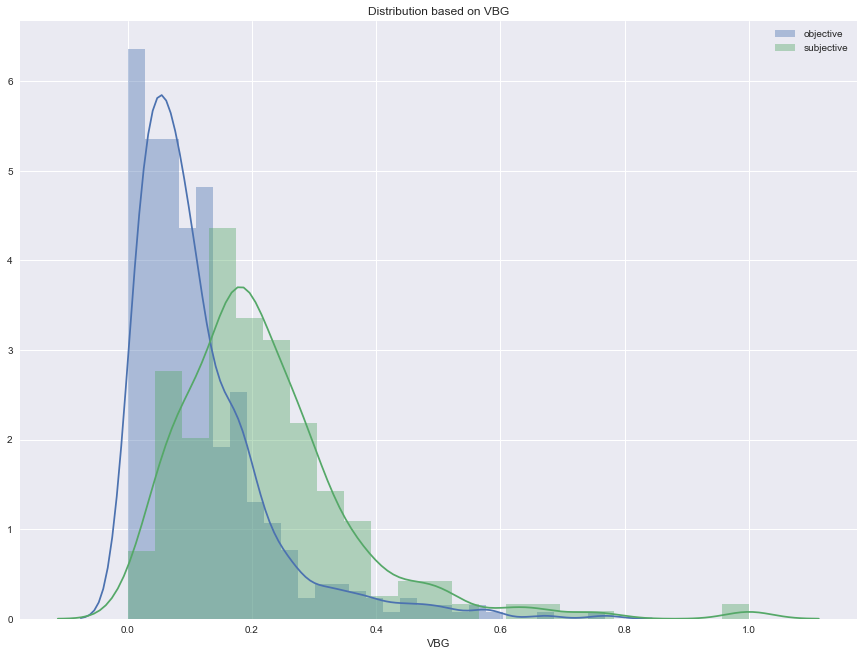

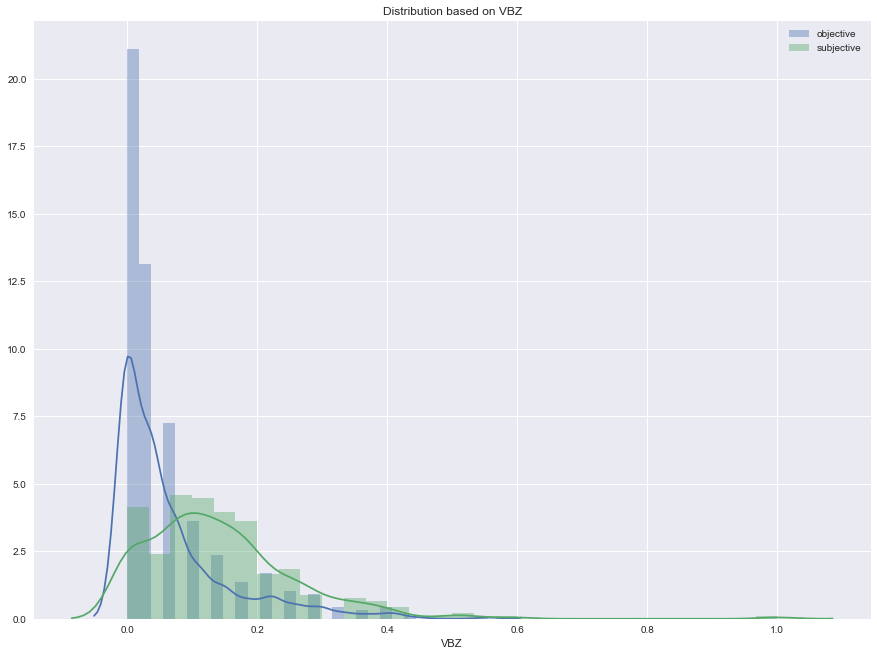

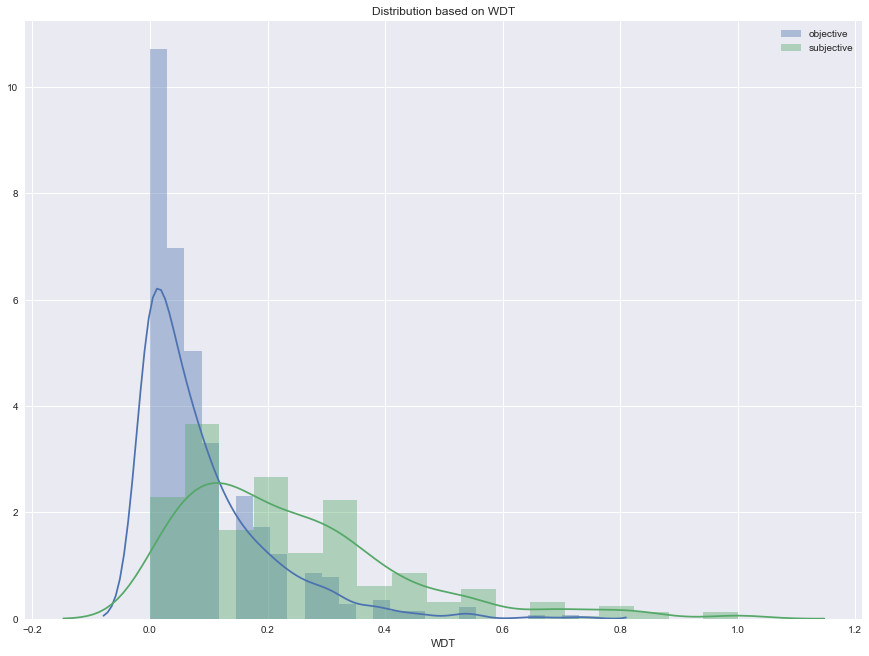

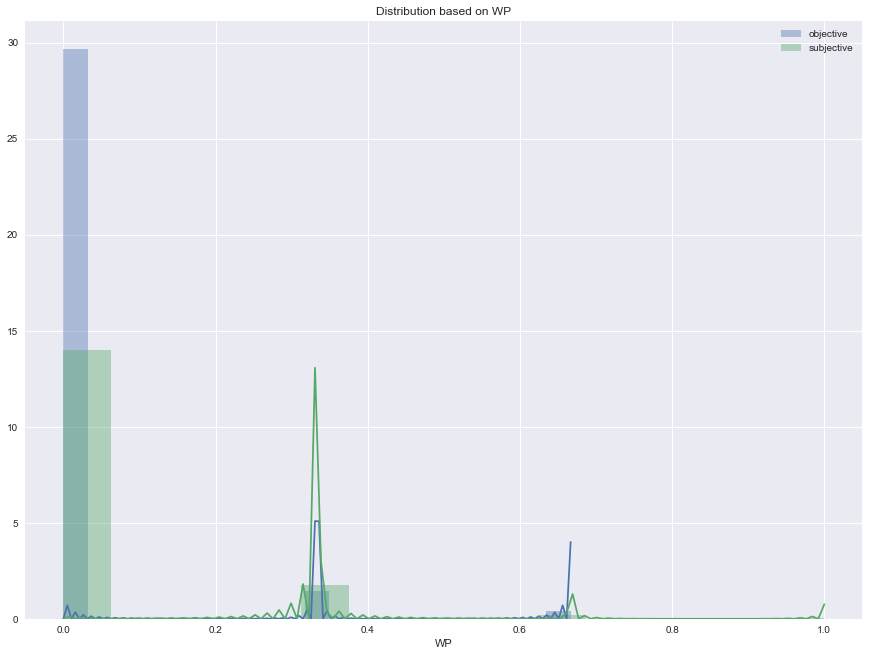

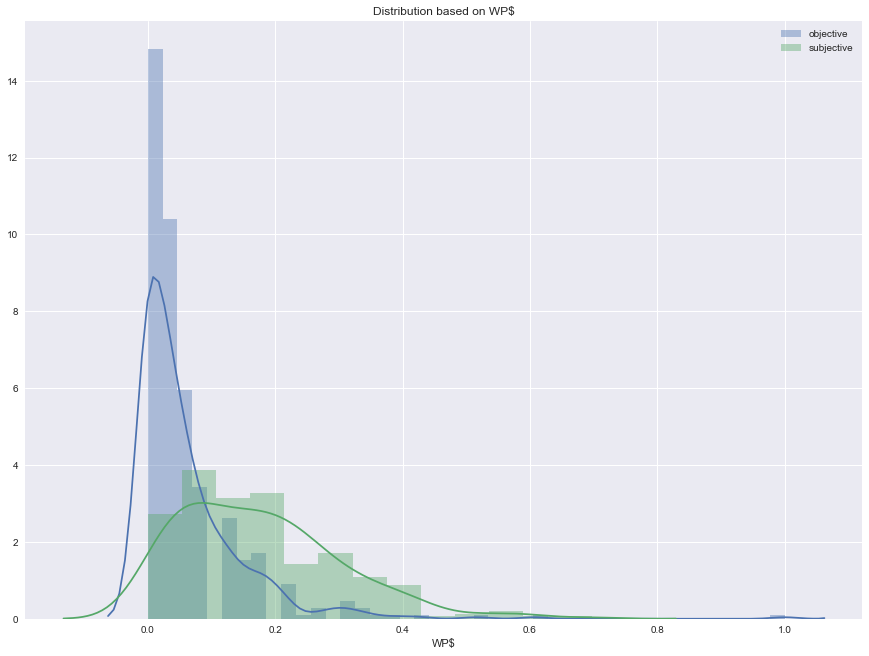

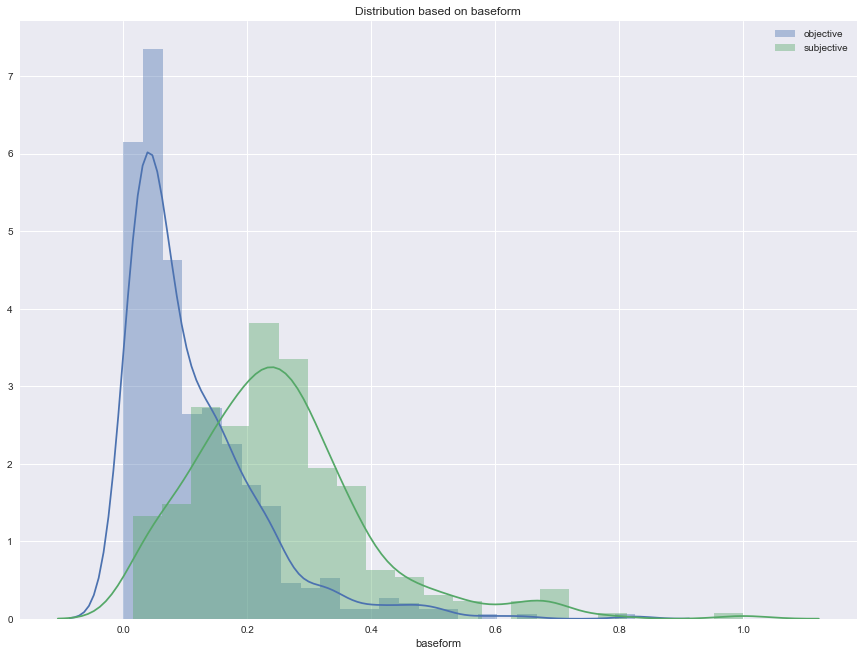

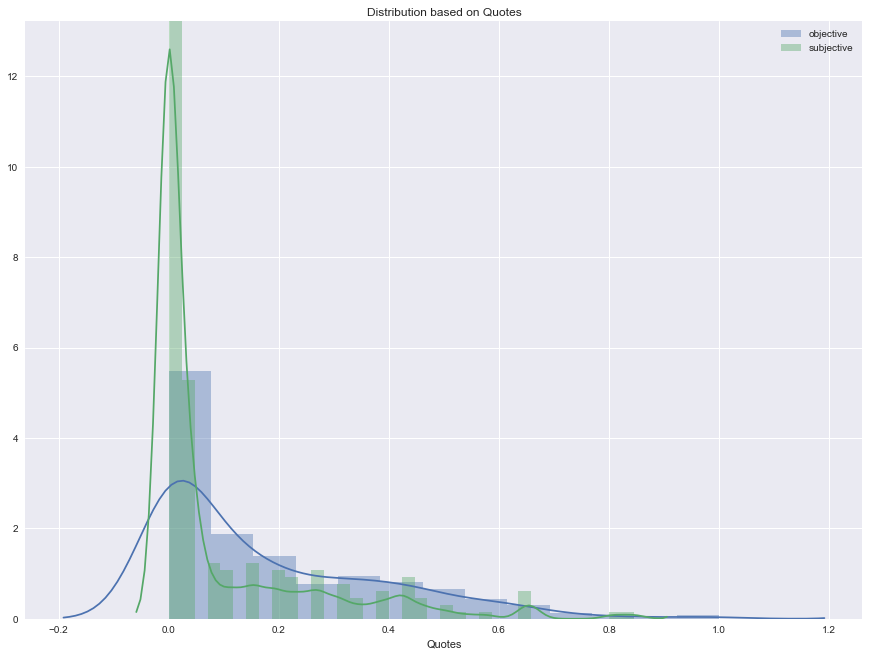

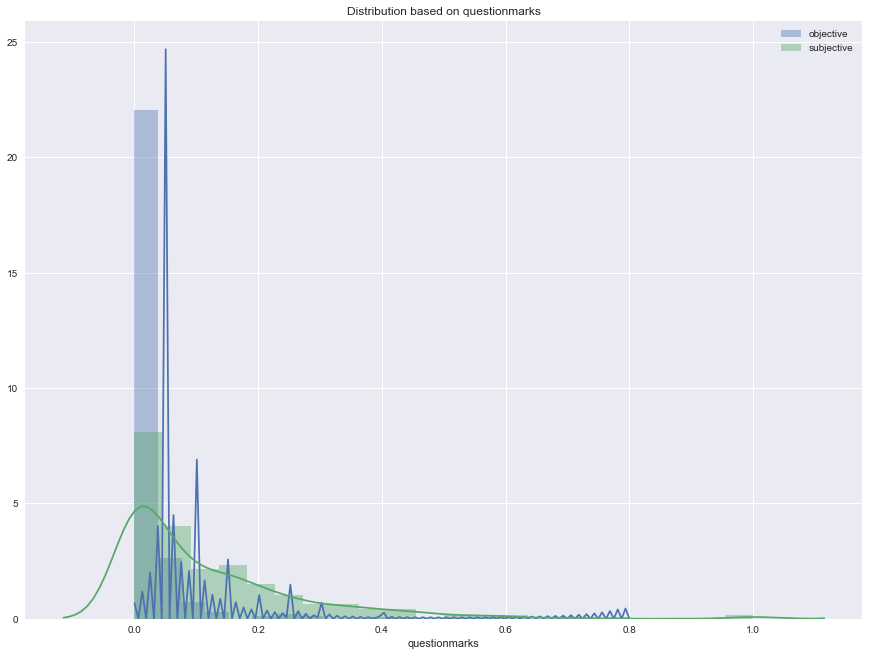

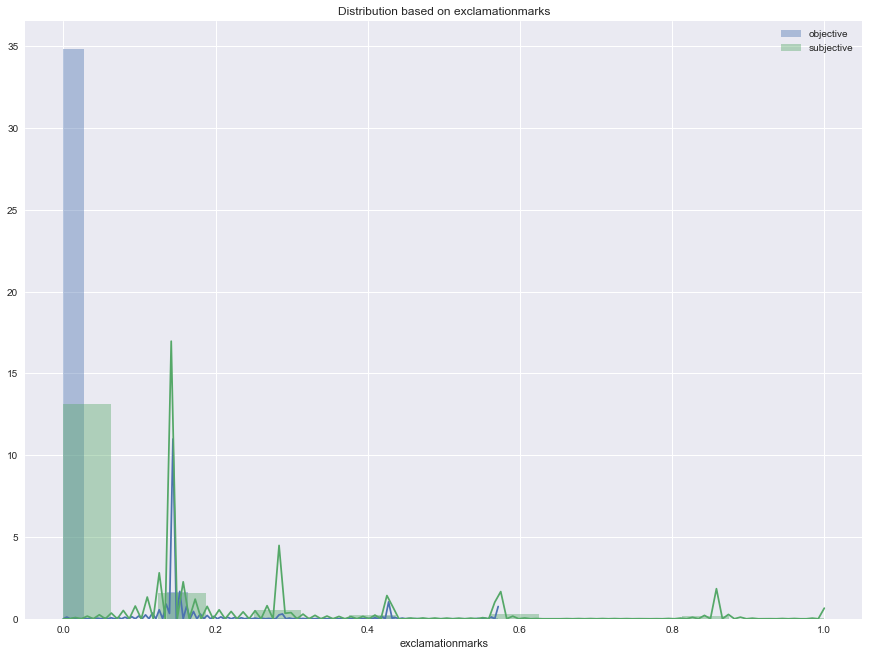

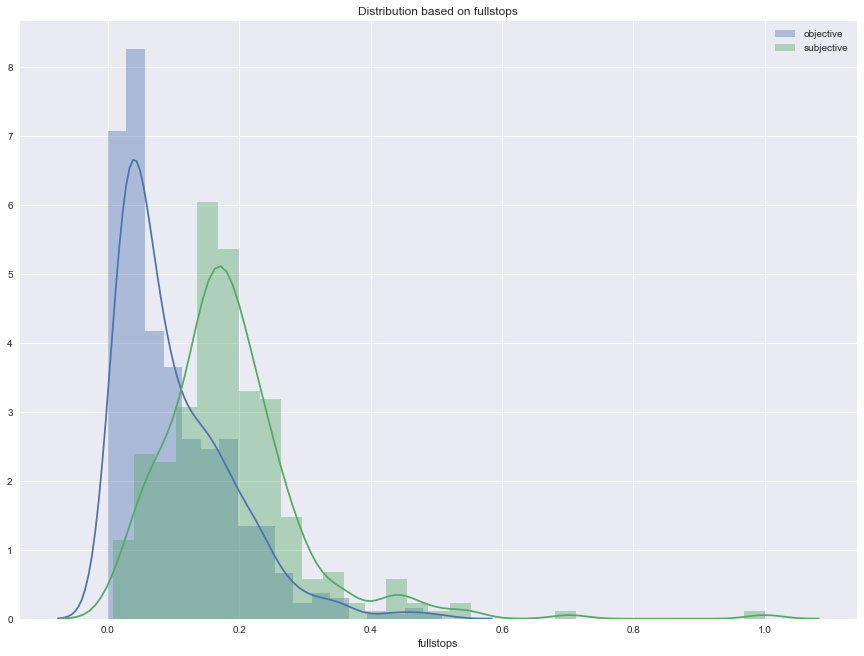

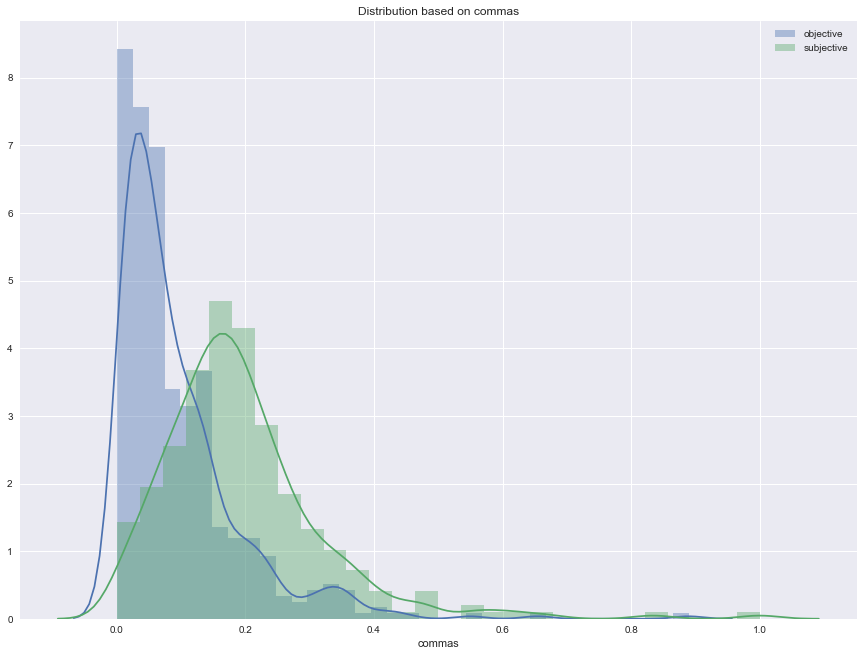

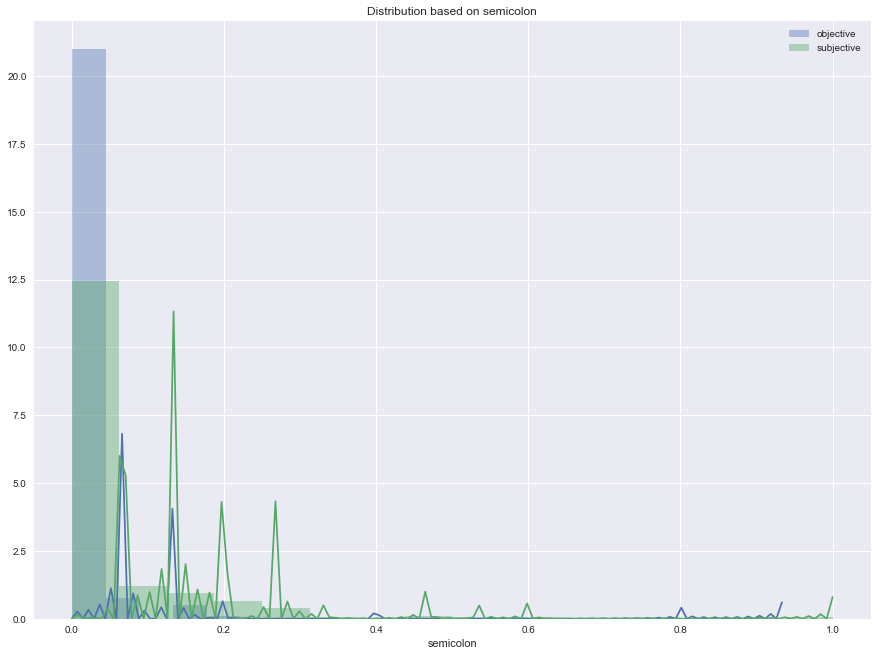

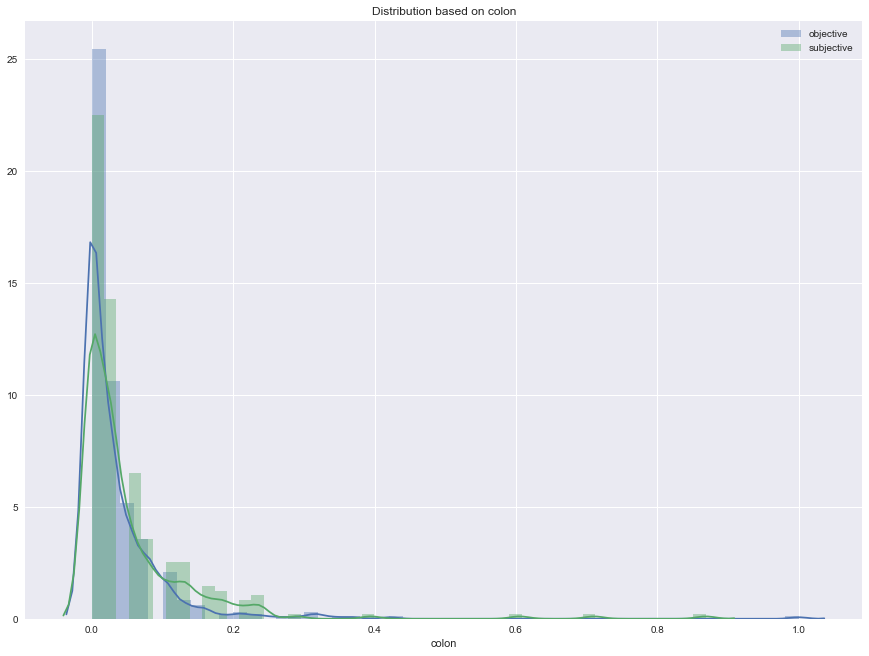

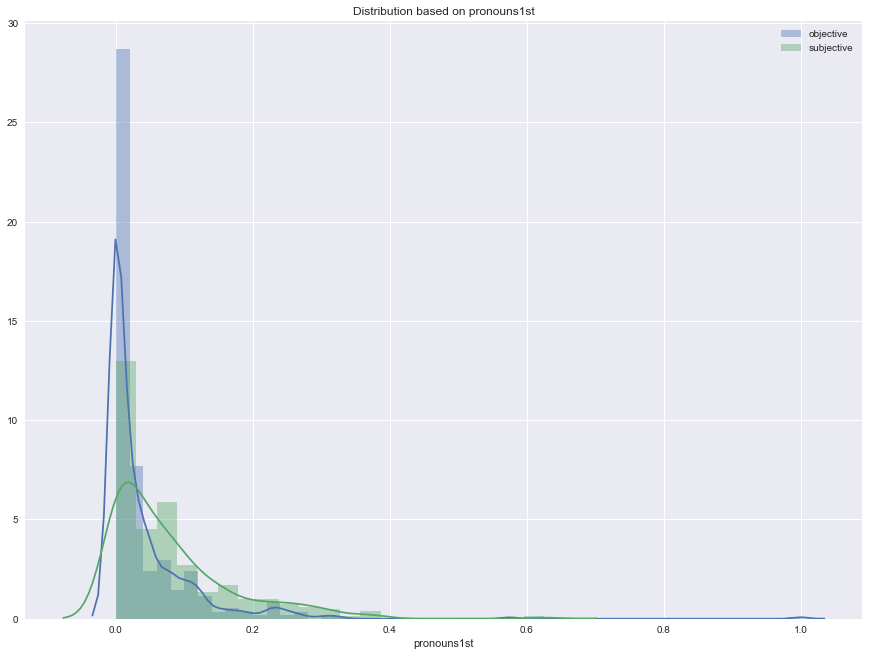

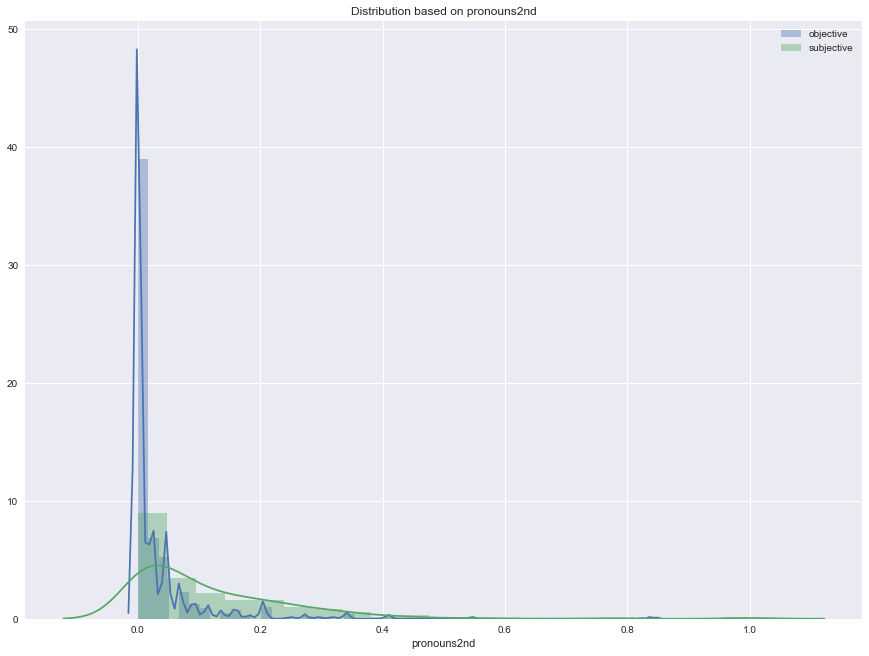

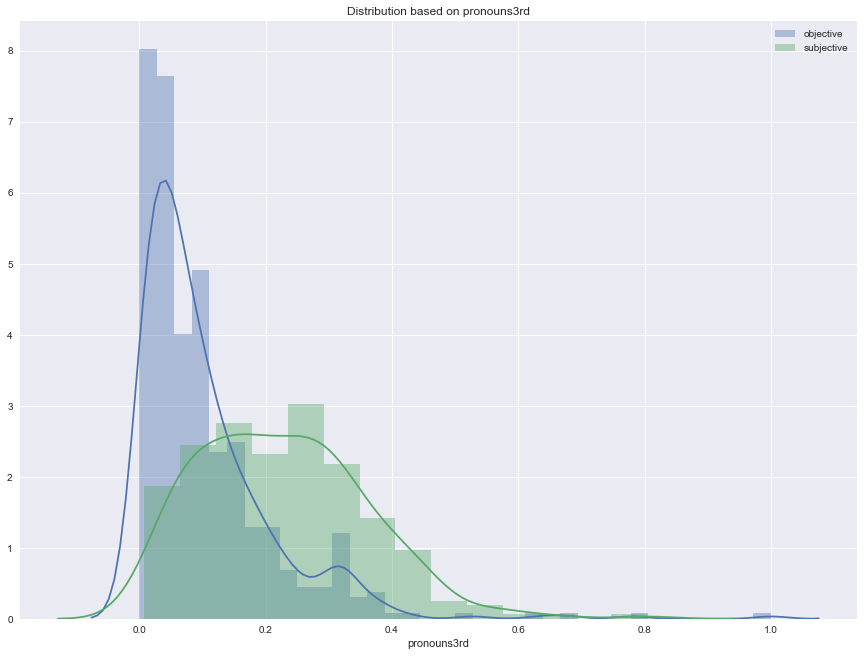

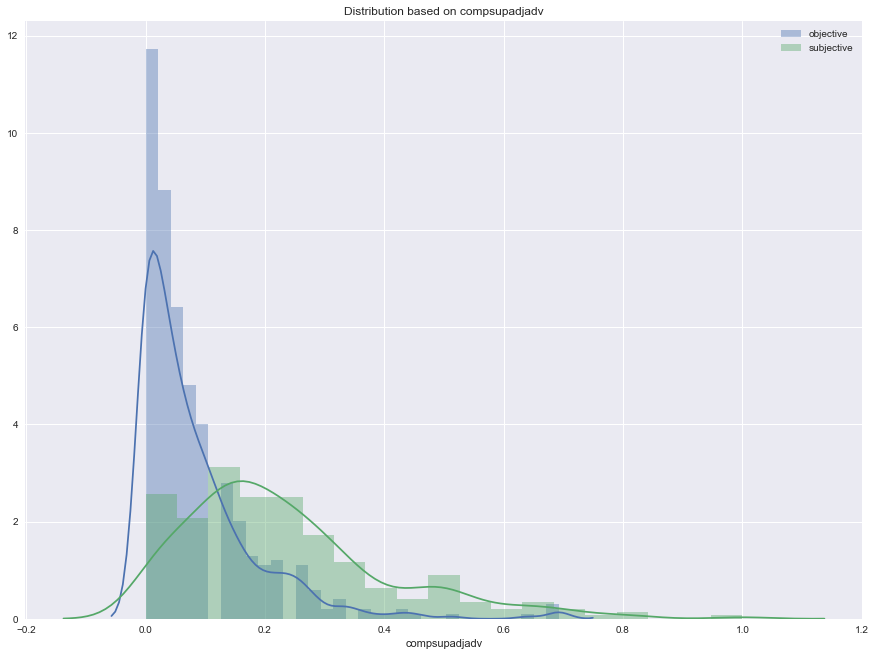

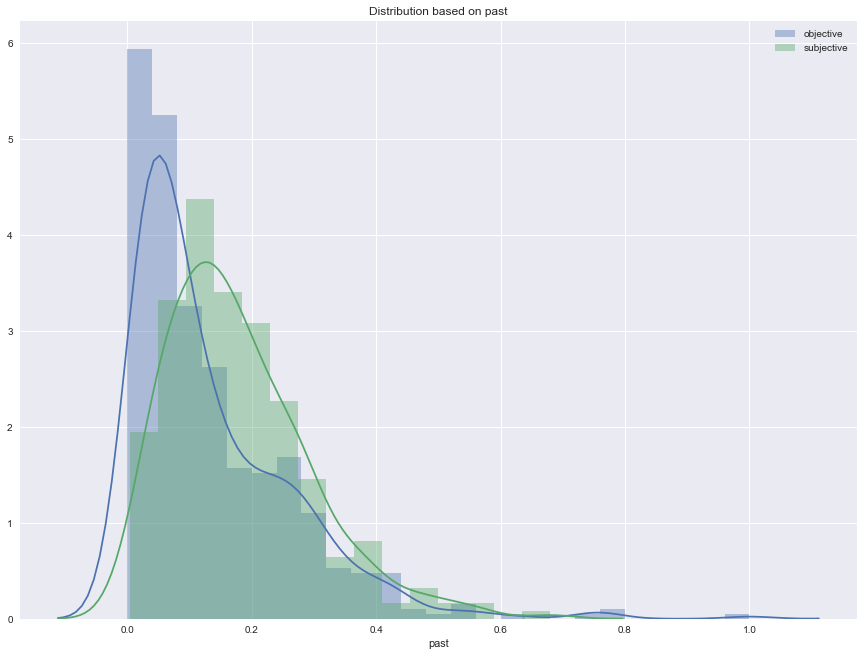

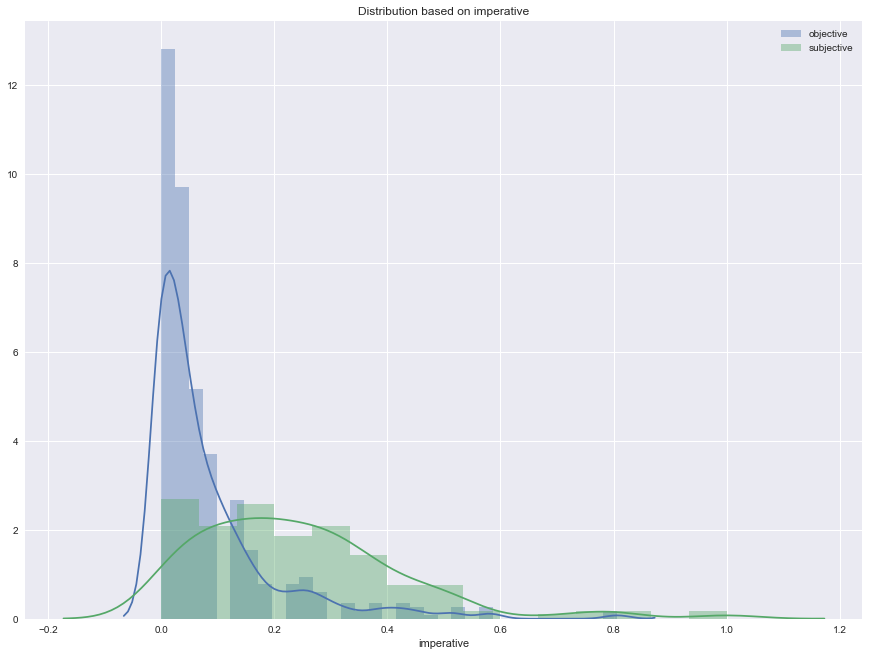

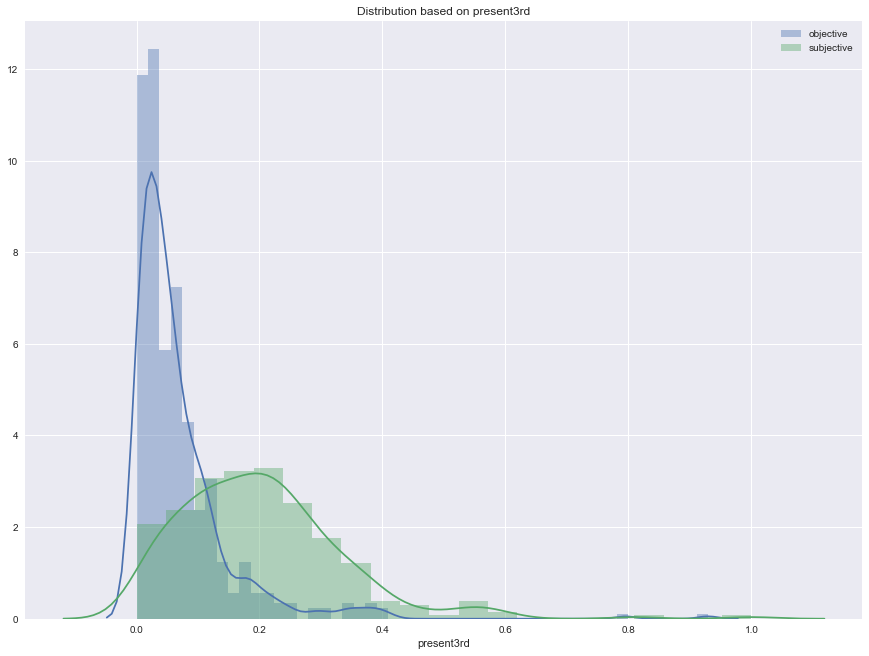

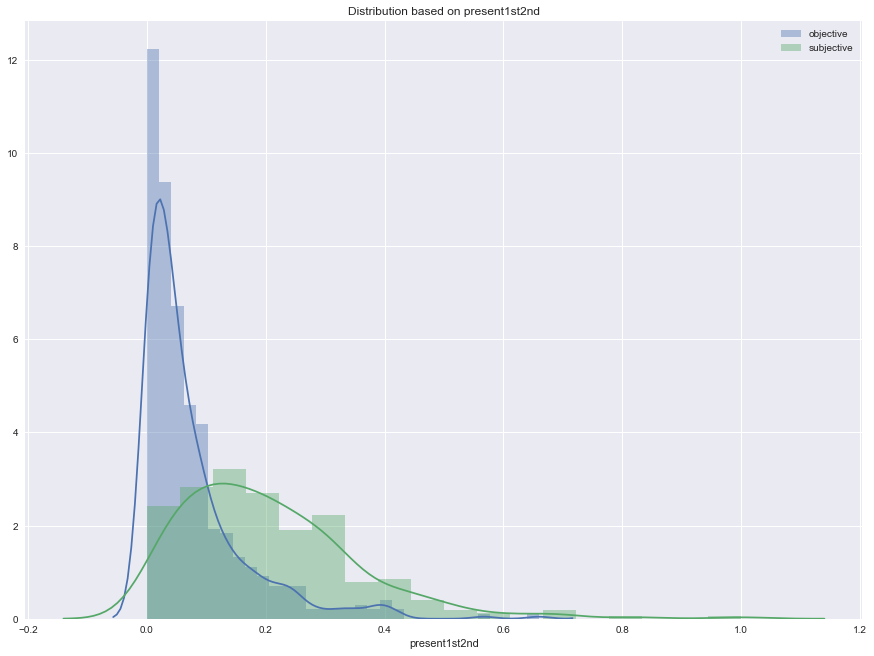

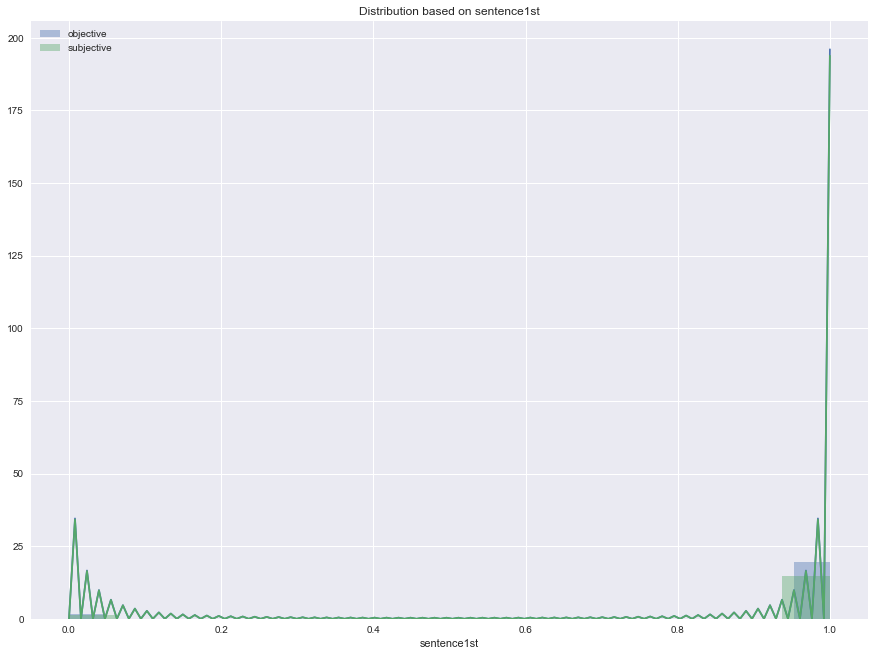

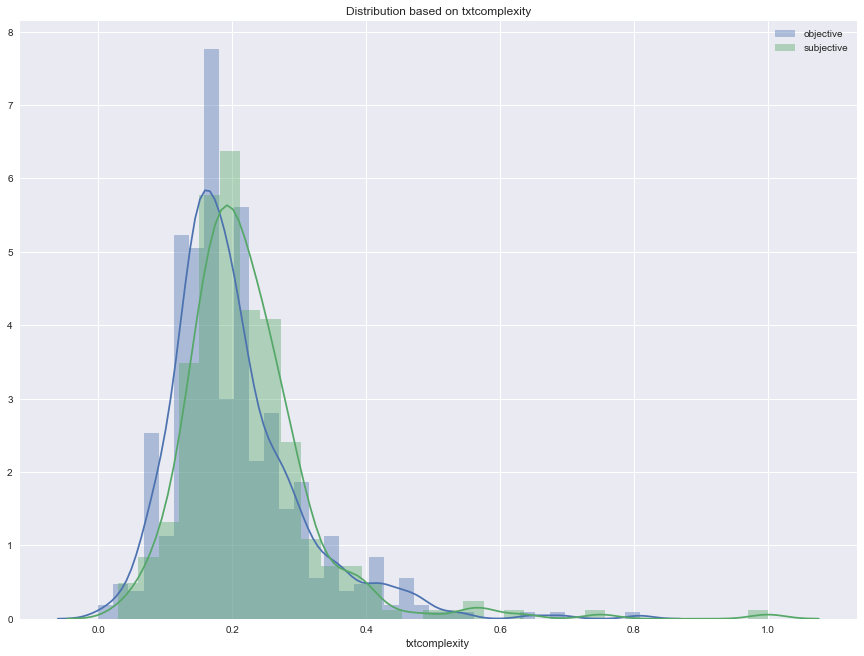

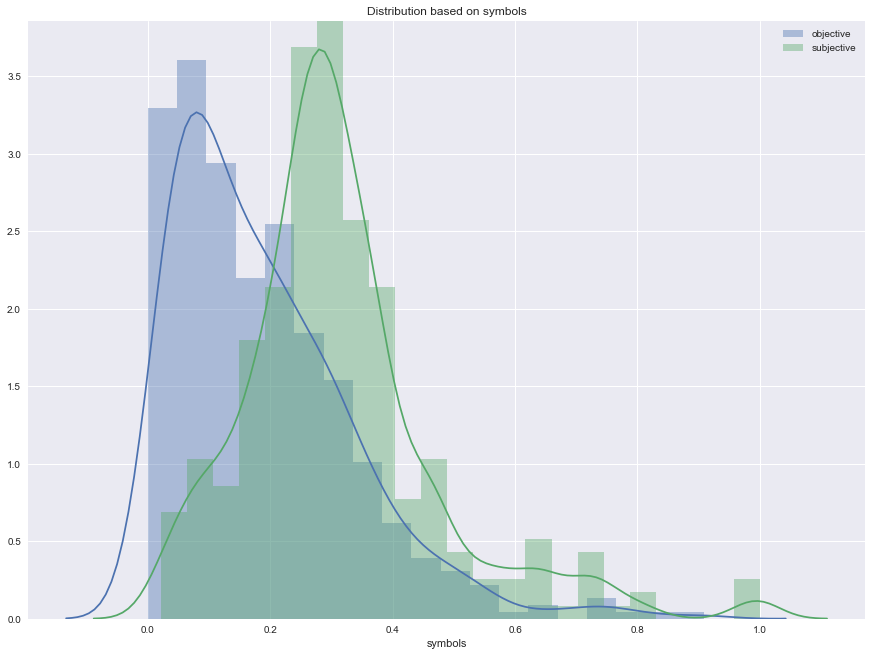

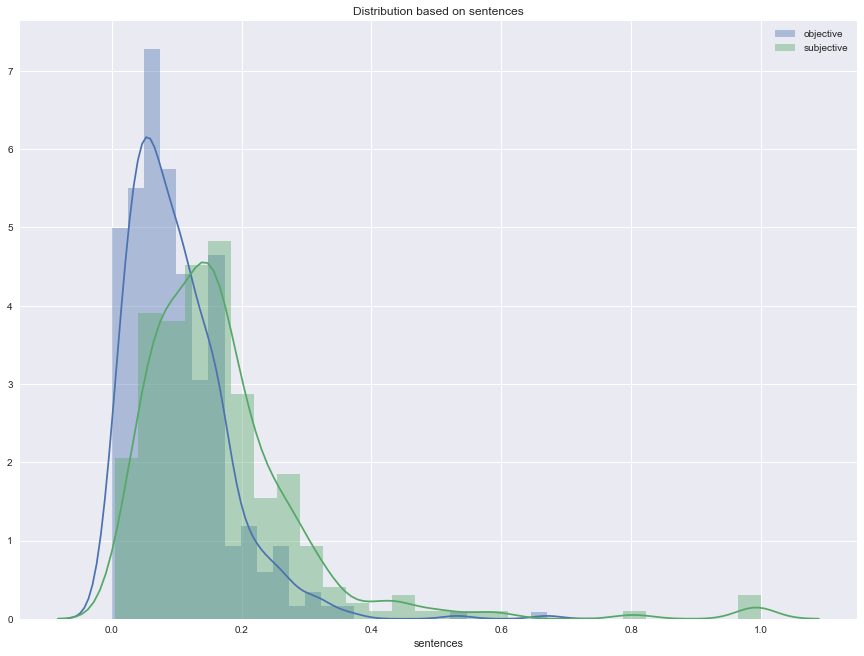

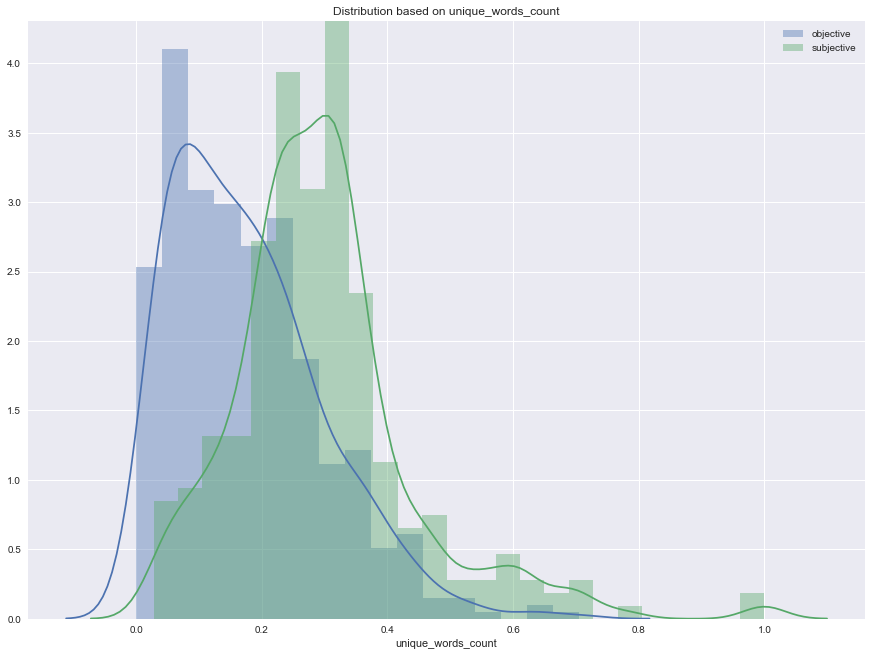

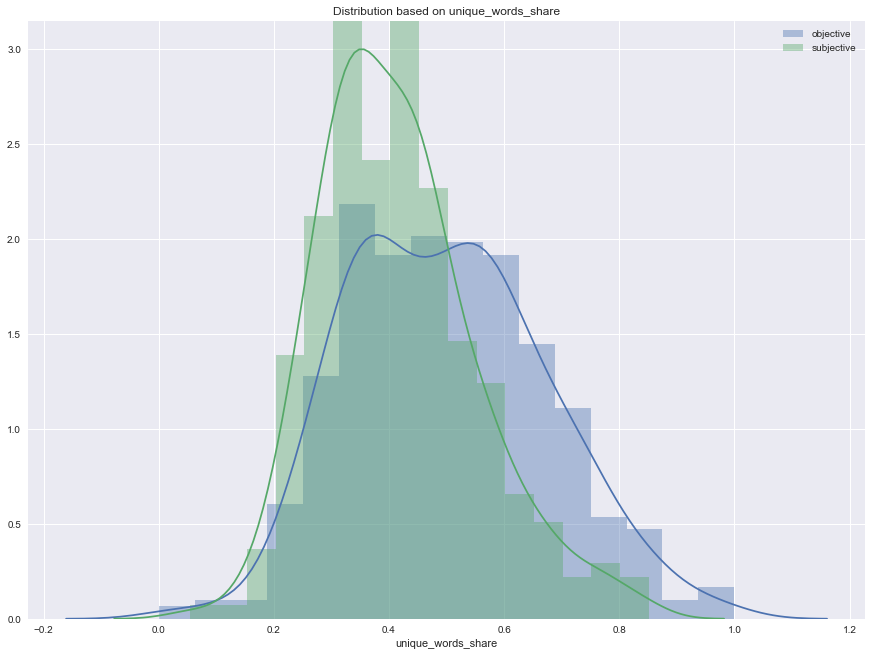

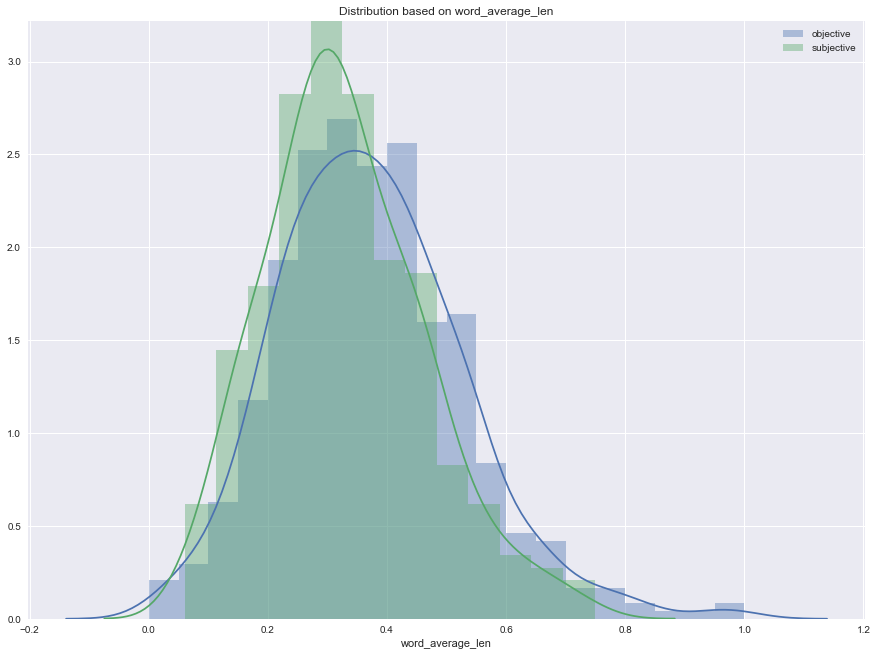

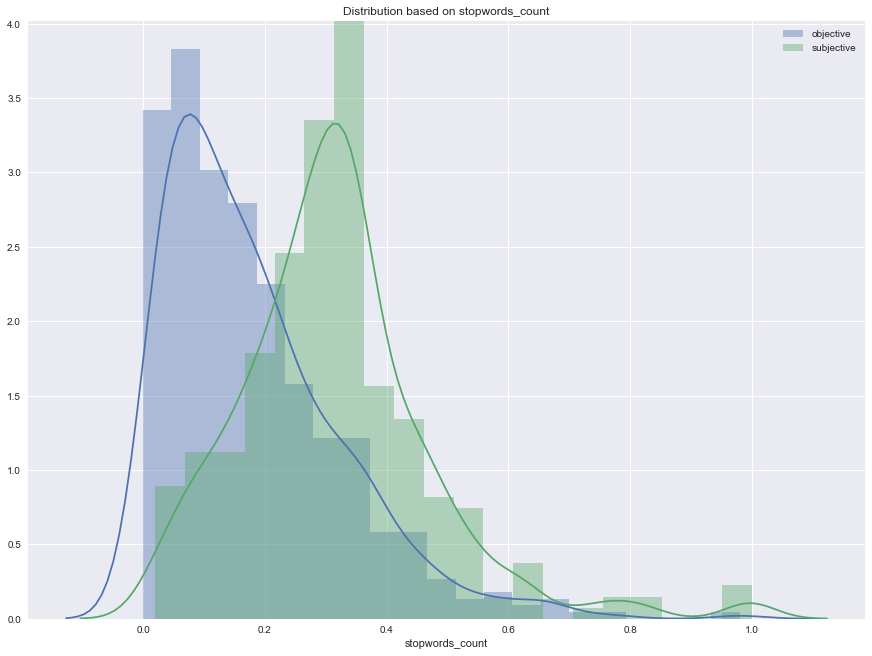

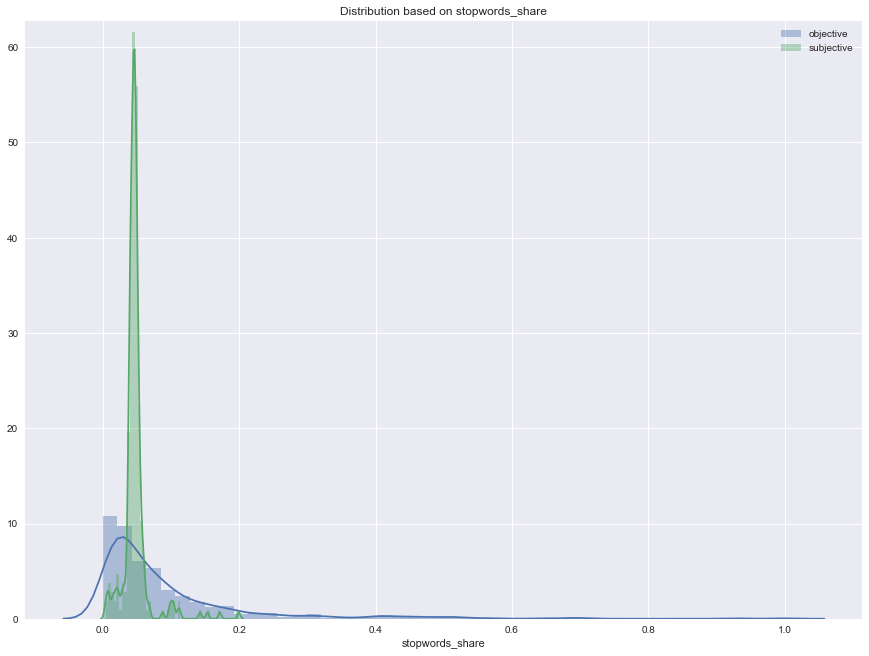

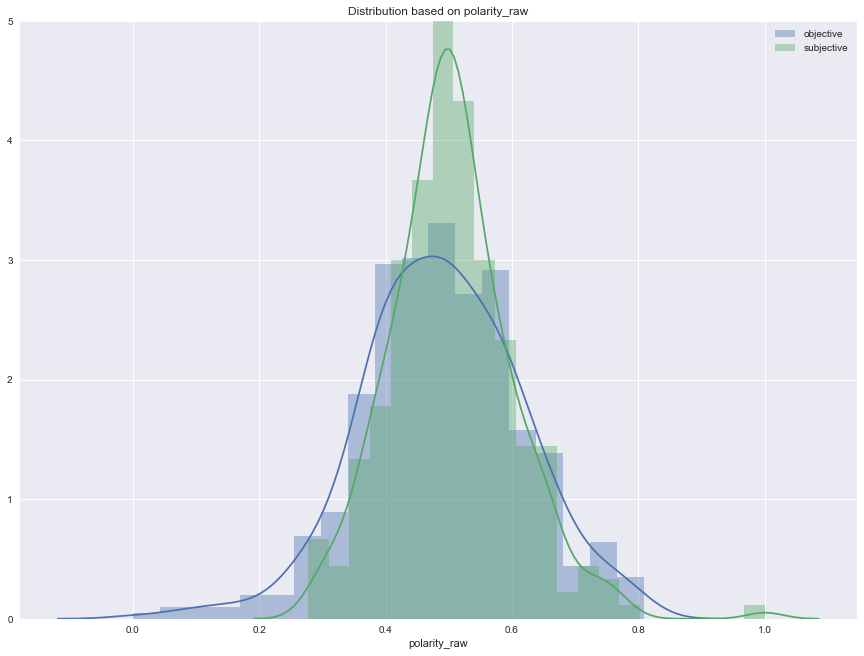

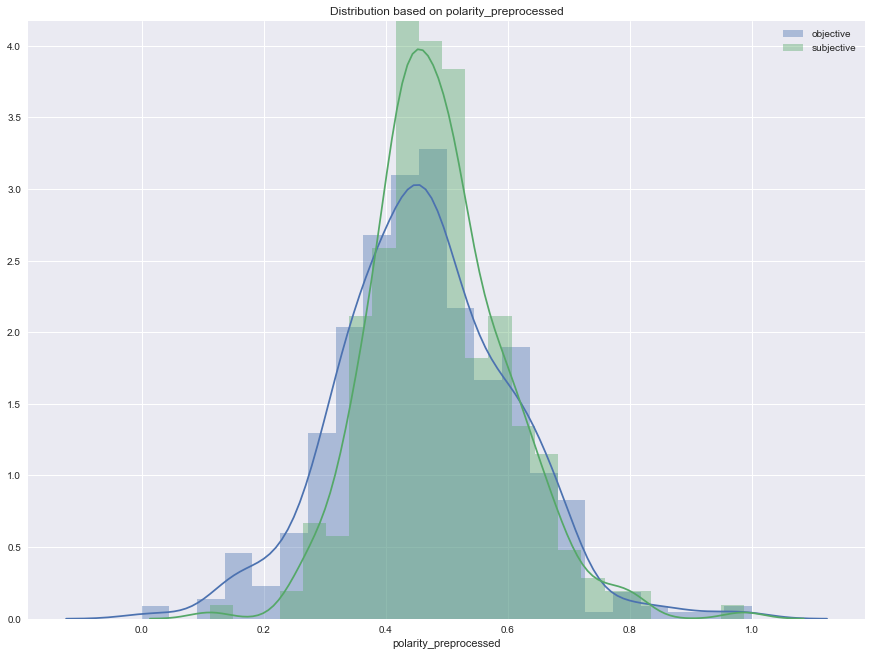

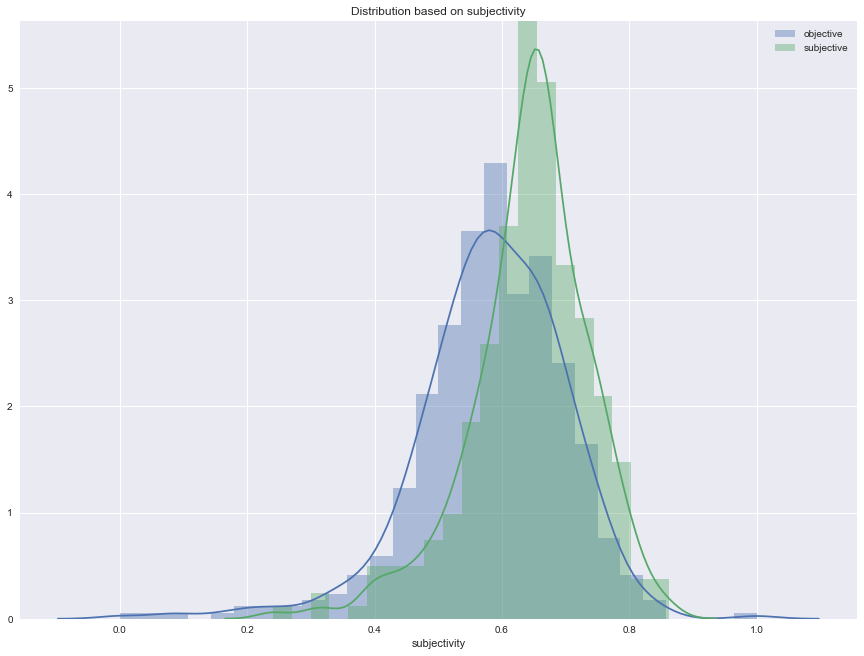

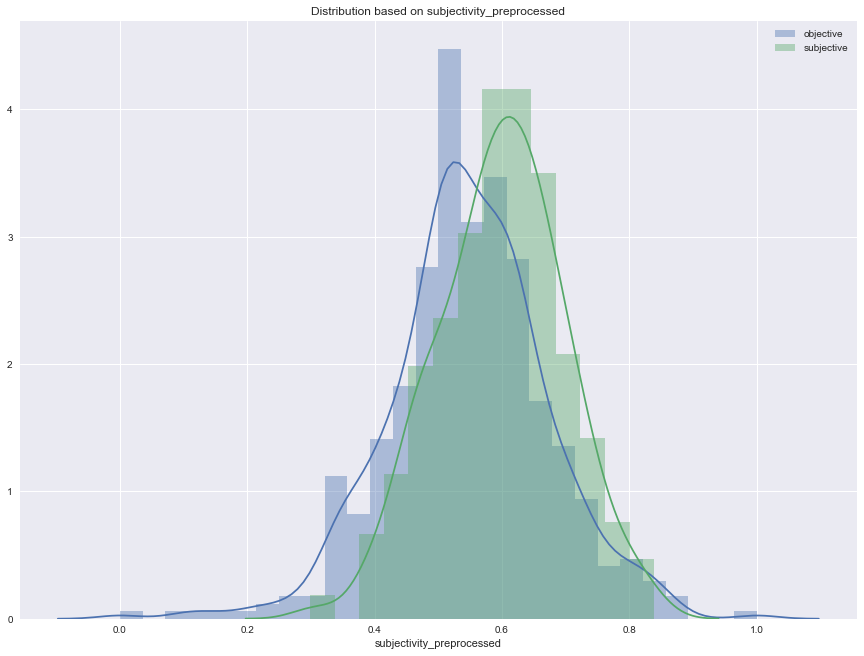

In [36]:
for feature in X_train.columns:
    plt.title('Distribution based on ' + feature)
    sns.distplot(X_train[feature][y_train == 0], label='objective', norm_hist=True)
    sns.distplot(X_train[feature][y_train == 1], label='subjective', norm_hist=True)
    plt.xlabel(feature)
    plt.legend(loc='best')
    plt.show()

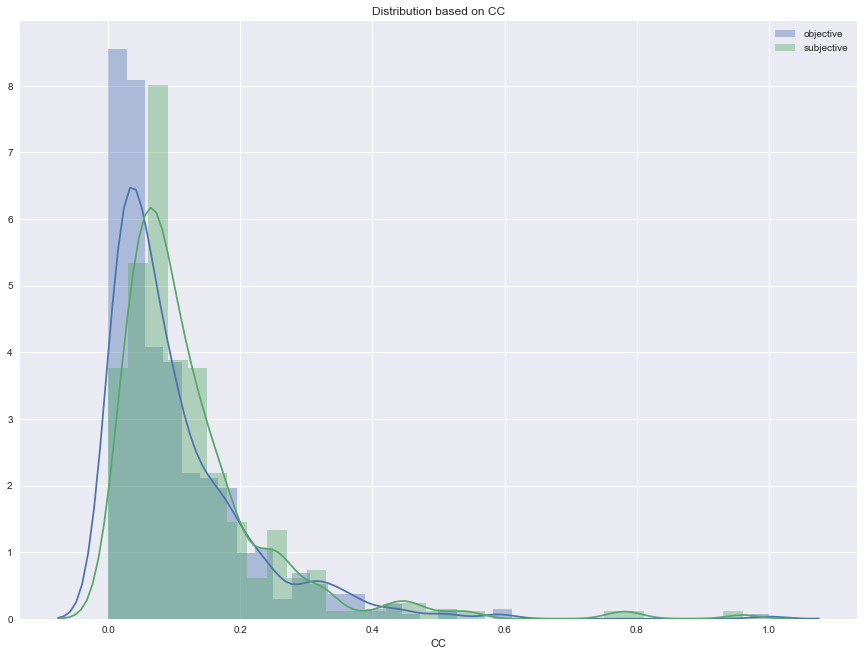

In [38]:
feature = 'CC'
plt.title('Distribution based on ' + feature)
sns.distplot(X_train[feature][y_train == 0], label='objective', norm_hist=True)
sns.distplot(X_train[feature][y_train == 1], label='subjective', norm_hist=True)
plt.xlabel(feature)
plt.legend(loc='best')
plt.show()

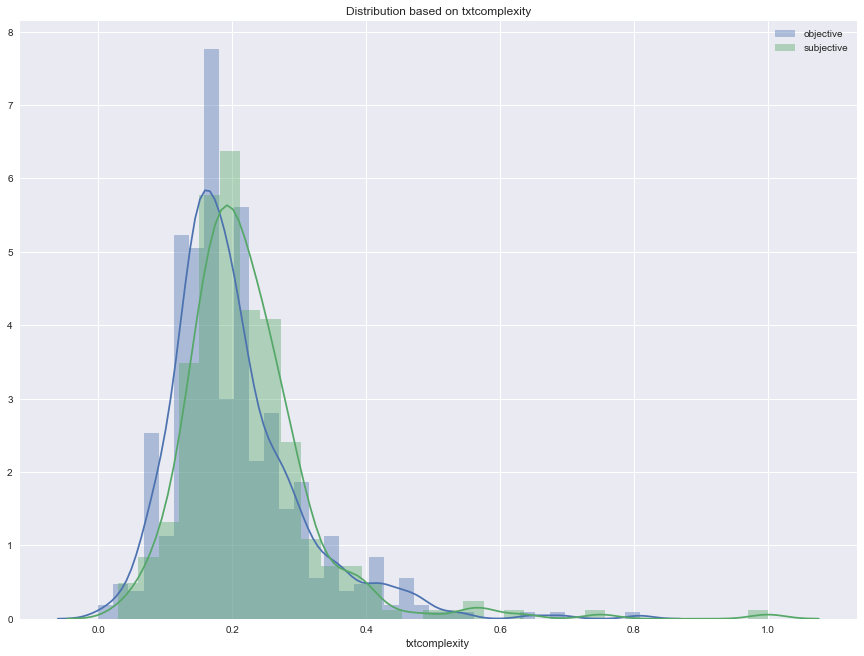

In [39]:
feature = 'txtcomplexity'
plt.title('Distribution based on ' + feature)
sns.distplot(X_train[feature][y_train == 0], label='objective', norm_hist=True)
sns.distplot(X_train[feature][y_train == 1], label='subjective', norm_hist=True)
plt.xlabel(feature)
plt.legend(loc='best')
plt.show()

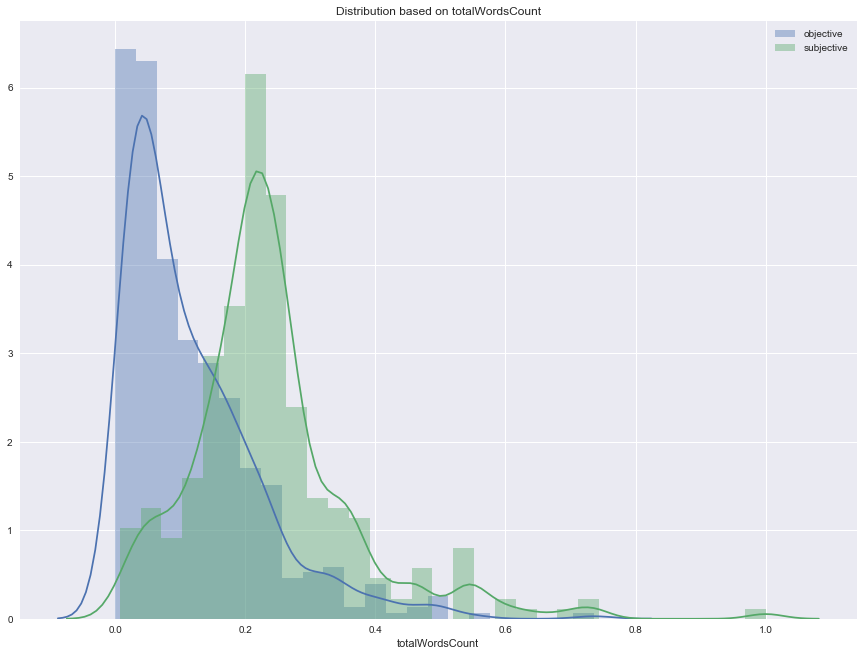

In [40]:
feature = 'totalWordsCount'
plt.title('Distribution based on ' + feature)
sns.distplot(X_train[feature][y_train == 0], label='objective', norm_hist=True)
sns.distplot(X_train[feature][y_train == 1], label='subjective', norm_hist=True)
plt.xlabel(feature)
plt.legend(loc='best')
plt.show()

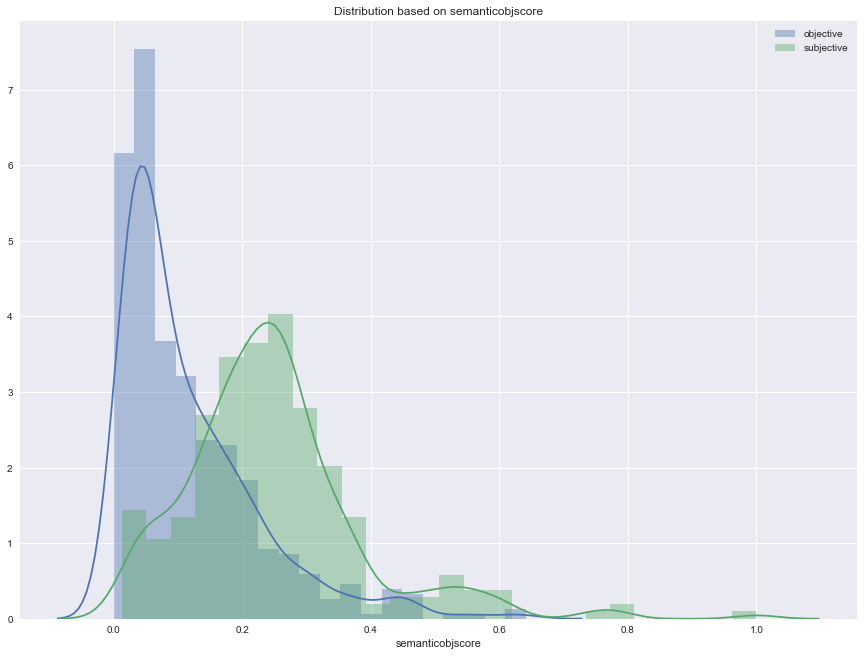

In [41]:
feature = 'semanticobjscore'
plt.title('Distribution based on ' + feature)
sns.distplot(X_train[feature][y_train == 0], label='objective', norm_hist=True)
sns.distplot(X_train[feature][y_train == 1], label='subjective', norm_hist=True)
plt.xlabel(feature)
plt.legend(loc='best')
plt.show()

# Models

In [35]:
kf = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)
class_weight = {0: (y_train == 0).mean(), 1: 1 - (y_train == 0).mean()}

### Logistic Regression

In [36]:
%%time
lr = LogisticRegression(random_state=13, class_weight=class_weight)
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 100, 1000]}
grid_result = GridSearchCV(estimator=lr, cv=kf, param_grid=param_grid, scoring='roc_auc')
grid_result.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.902383 using {'C': 20, 'penalty': 'l1'}
0.500000 (0.000000) with: {'C': 0.001, 'penalty': 'l1'}
0.444780 (0.023554) with: {'C': 0.001, 'penalty': 'l2'}
0.500000 (0.000000) with: {'C': 0.005, 'penalty': 'l1'}
0.766561 (0.031489) with: {'C': 0.005, 'penalty': 'l2'}
0.500000 (0.000000) with: {'C': 0.01, 'penalty': 'l1'}
0.815182 (0.032497) with: {'C': 0.01, 'penalty': 'l2'}
0.500000 (0.000000) with: {'C': 0.05, 'penalty': 'l1'}
0.849821 (0.028354) with: {'C': 0.05, 'penalty': 'l2'}
0.525884 (0.044156) with: {'C': 0.1, 'penalty': 'l1'}
0.855259 (0.026994) with: {'C': 0.1, 'penalty': 'l2'}
0.848764 (0.024114) with: {'C': 0.5, 'penalty': 'l1'}
0.868680 (0.023883) with: {'C': 0.5, 'penalty': 'l2'}
0.876537 (0.012835) with: {'C': 1, 'penalty': 'l1'}
0.874961 (0.020249) with: {'C': 1, 'penalty': 'l2'}
0.899589 (0.006524) with: {'C': 5, 'penalty': 'l1'}
0.886202 (0.012838) with: {'C': 5, 'penalty': 'l2'}
0.901242 (0.007470) with: {'C': 10, 'penalty': 'l1'}
0.889696 (0.010102) with: {'C':

In [37]:
lr = LogisticRegression(C=20, penalty='l1', random_state=13, class_weight=class_weight)
lr.fit(X_train, y_train)
lr_prediction = lr.predict_proba(X_test)
roc_auc_score(y_test, lr_prediction[:, 1])

0.9003386550556362

### KNN

In [39]:
%%time
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1, 202, 2)), 'weights': ['uniform', 'distance']}
grid_result = GridSearchCV(estimator=knn, cv=kf, param_grid=param_grid, scoring='roc_auc')
grid_result.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.898664 using {'n_neighbors': 11, 'weights': 'distance'}
0.800587 (0.013452) with: {'n_neighbors': 1, 'weights': 'uniform'}
0.800587 (0.013452) with: {'n_neighbors': 1, 'weights': 'distance'}
0.854981 (0.012239) with: {'n_neighbors': 3, 'weights': 'uniform'}
0.857850 (0.010806) with: {'n_neighbors': 3, 'weights': 'distance'}
0.877342 (0.010796) with: {'n_neighbors': 5, 'weights': 'uniform'}
0.880404 (0.007887) with: {'n_neighbors': 5, 'weights': 'distance'}
0.888958 (0.003598) with: {'n_neighbors': 7, 'weights': 'uniform'}
0.890969 (0.004544) with: {'n_neighbors': 7, 'weights': 'distance'}
0.892614 (0.010107) with: {'n_neighbors': 9, 'weights': 'uniform'}
0.895332 (0.010319) with: {'n_neighbors': 9, 'weights': 'distance'}
0.896749 (0.006413) with: {'n_neighbors': 11, 'weights': 'uniform'}
0.898664 (0.007725) with: {'n_neighbors': 11, 'weights': 'distance'}
0.894908 (0.004909) with: {'n_neighbors': 13, 'weights': 'uniform'}
0.897613 (0.005620) with: {'n_neighbors': 13, 'weights':

In [40]:
knn = KNeighborsClassifier(n_neighbors=11, weights='distance')
knn.fit(X_train, y_train)
knn_prediction = knn.predict_proba(X_test)
roc_auc_score(y_test, knn_prediction[:, 1])

0.8989909461607577

### RF

In [41]:
%%time
rf = RandomForestClassifier(random_state=13)
param_grid = {'n_estimators': [200, 500, 1000], 'max_features': ['auto', 'log2'], 'max_depth': [4, 5, 6, 7, 8],
              'criterion': ['gini', 'entropy']}
clf = GridSearchCV(estimator=rf, cv=kf, param_grid=param_grid, scoring='roc_auc')
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best params: {}'.format(clf.best_params_))

Best score: 0.9215357714572628
Best params: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Wall time: 9min 53s


In [42]:
rf = RandomForestClassifier(n_estimators=500, max_depth=8, criterion='entropy', random_state=13)
rf.fit(X_train, y_train)
rf_prediction = rf.predict_proba(X_test)
roc_auc_score(y_test, rf_prediction[:, 1])

0.928191305549796

### XGB

In [43]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=1000, max_depth=3, min_child_weight=1, subsample=0.8, colsample_bytree=1,
                     gamma=1, objective='binary:logistic', seed=13)
xgb.fit(X_train, y_train)
roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])

0.9375907111756169

In [44]:
%%time
xgb = XGBClassifier(learning_rate=0.01, n_estimators=1000, max_depth=3, min_child_weight=1, subsample=0.8, colsample_bytree=1,
                     gamma=1, objective='binary:logistic', seed=13, verbose=1)
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8]}
clf = GridSearchCV(estimator=xgb, cv=kf, param_grid=param_grid, scoring='roc_auc', verbose=1)
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best params: {}'.format(clf.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.4min finished


Best score: 0.9346515461633883
Best params: {'max_depth': 6}
Wall time: 2min 28s


In [45]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=1000, max_depth=6, min_child_weight=1, subsample=0.8, colsample_bytree=1,
                     gamma=1, objective='binary:logistic', seed=13)
xgb.fit(X_train, y_train)
roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])

0.9398023360287512

In [46]:
%%time
xgb = XGBClassifier(learning_rate=0.01, n_estimators=1000, max_depth=6, min_child_weight=1, subsample=0.8, colsample_bytree=1,
                     gamma=1, objective='binary:logistic', seed=13, verbose=2)
param_grid = {'learning_rate': [0.01, 0.03, 0.05, 0.075, 0.1]}
clf = GridSearchCV(estimator=xgb, cv=kf, param_grid=param_grid, scoring='roc_auc', verbose=1)
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best params: {}'.format(clf.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.1min finished


Best score: 0.9353808656742867
Best params: {'learning_rate': 0.03}
Wall time: 2min 12s


In [47]:
xgb = XGBClassifier(learning_rate=0.03, n_estimators=1000, max_depth=6, min_child_weight=1, subsample=0.8, colsample_bytree=1,
                     gamma=1, objective='binary:logistic', seed=13)
xgb.fit(X_train, y_train)
xgb_prediction = xgb.predict_proba(X_test)
roc_auc_score(y_test, xgb_prediction[:, 1])

0.9399405625820719

In [48]:
%%time
xgb = XGBClassifier(learning_rate=0.03, n_estimators=1000, max_depth=6, min_child_weight=1, subsample=0.8, colsample_bytree=1,
                     gamma=1, objective='binary:logistic', seed=13, verbose=2)
param_grid = {'subsample': [0.8, 0.85, 0.9, 0.95, 1]}
clf = GridSearchCV(estimator=xgb, cv=kf, param_grid=param_grid, scoring='roc_auc', verbose=1)
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best params: {}'.format(clf.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.1min finished


Best score: 0.9353808656742867
Best params: {'subsample': 0.8}
Wall time: 2min 14s


In [49]:
%%time
xgb = XGBClassifier(learning_rate=0.03, n_estimators=1000, max_depth=6, min_child_weight=1, subsample=0.8, colsample_bytree=1,
                     gamma=1, objective='binary:logistic', seed=13, verbose=2)
param_grid = {'colsample_bytree': [0.8, 0.85, 0.9, 0.95, 1]}
clf = GridSearchCV(estimator=xgb, cv=kf, param_grid=param_grid, scoring='roc_auc', verbose=1)
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best params: {}'.format(clf.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.9min finished


Best score: 0.9354532857817945
Best params: {'colsample_bytree': 0.95}
Wall time: 2min 2s


In [50]:
xgb = XGBClassifier(learning_rate=0.03, n_estimators=1000, max_depth=6, min_child_weight=1, subsample=0.8, colsample_bytree=0.95,
                     gamma=1, objective='binary:logistic', seed=13)
xgb.fit(X_train, y_train)
xgb_prediction = xgb.predict_proba(X_test)
roc_auc_score(y_test, xgb_prediction[:, 1])

0.9413919413919414

In [51]:
%%time
xgb = XGBClassifier(learning_rate=0.03, n_estimators=1000, max_depth=6, min_child_weight=1, subsample=0.8, colsample_bytree=0.95,
                     gamma=1, objective='binary:logistic', seed=13, verbose=2)
param_grid = {'gamma': [0, 1, 2, 3, 4, 5]}
clf = GridSearchCV(estimator=xgb, cv=kf, param_grid=param_grid, scoring='roc_auc', verbose=1)
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best params: {}'.format(clf.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.3min finished


Best score: 0.9361484612203913
Best params: {'gamma': 3}
Wall time: 2min 26s


In [52]:
xgb = XGBClassifier(learning_rate=0.03, n_estimators=1000, max_depth=6, min_child_weight=1, subsample=0.8, colsample_bytree=0.95,
                     gamma=3, objective='binary:logistic', seed=13)
xgb.fit(X_train, y_train)
xgb_prediction = xgb.predict_proba(X_test)
roc_auc_score(y_test, xgb_prediction[:, 1])

0.9414610546686019

In [53]:
%%time
xgb = XGBClassifier(learning_rate=0.03, n_estimators=1000, max_depth=6, min_child_weight=1, subsample=0.8, colsample_bytree=0.95,
                     gamma=1, objective='binary:logistic', seed=13, verbose=2)
param_grid = {'n_estimators': [1000, 1500, 2000], 'learning_rate': [0.03, 0.015, 0.005, 0.001]}
clf = GridSearchCV(estimator=xgb, cv=kf, param_grid=param_grid, scoring='roc_auc', verbose=1)
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best params: {}'.format(clf.best_params_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  7.4min finished


Best score: 0.9354532857817945
Best params: {'learning_rate': 0.03, 'n_estimators': 1000}
Wall time: 7min 31s


# Results

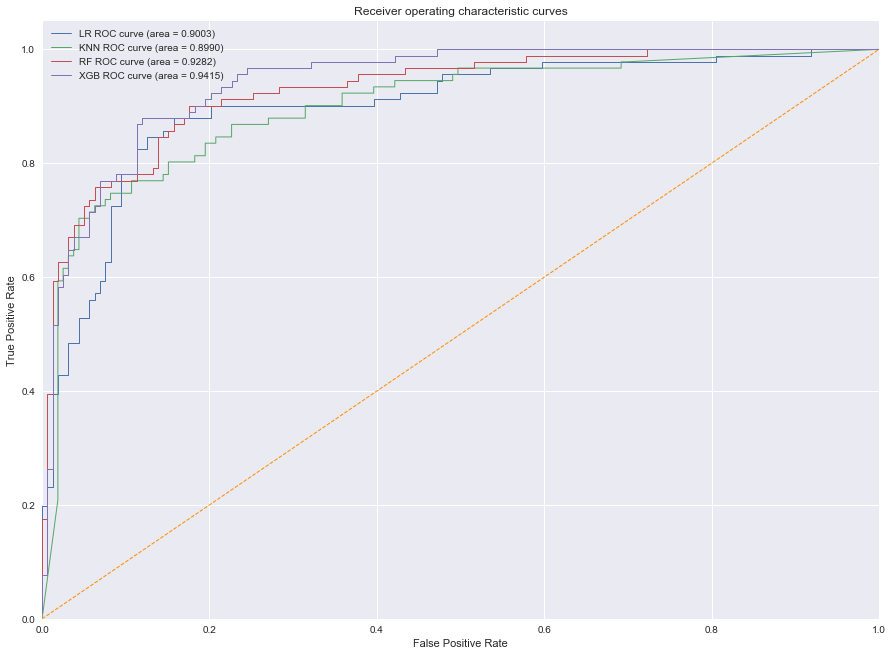

In [54]:
def generate_metrics(prediction):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test, prediction[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    return fpr, tpr, roc_auc


lr_fpr, lr_tpr, lr_roc_auc = generate_metrics(lr_prediction)
knn_fpr, knn_tpr, knn_roc_auc = generate_metrics(knn_prediction)
rf_fpr, rf_tpr, rf_roc_auc = generate_metrics(rf_prediction)
xgb_fpr, xgb_tpr, xgb_roc_auc = generate_metrics(xgb_prediction)
plt.plot(lr_fpr[1], lr_tpr[1], lw=1, label='LR ROC curve (area = %0.4f)' % lr_roc_auc[1])
plt.plot(knn_fpr[1], knn_tpr[1], lw=1, label='KNN ROC curve (area = %0.4f)' % knn_roc_auc[1])
plt.plot(rf_fpr[1], rf_tpr[1], lw=1, label='RF ROC curve (area = %0.4f)' % rf_roc_auc[1])
plt.plot(xgb_fpr[1], xgb_tpr[1], lw=1, label='XGB ROC curve (area = %0.4f)' % xgb_roc_auc[1])
plt.plot([0, 1], [0, 1], lw=1, color='darkorange', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curves')
plt.legend(loc='best')
plt.show()

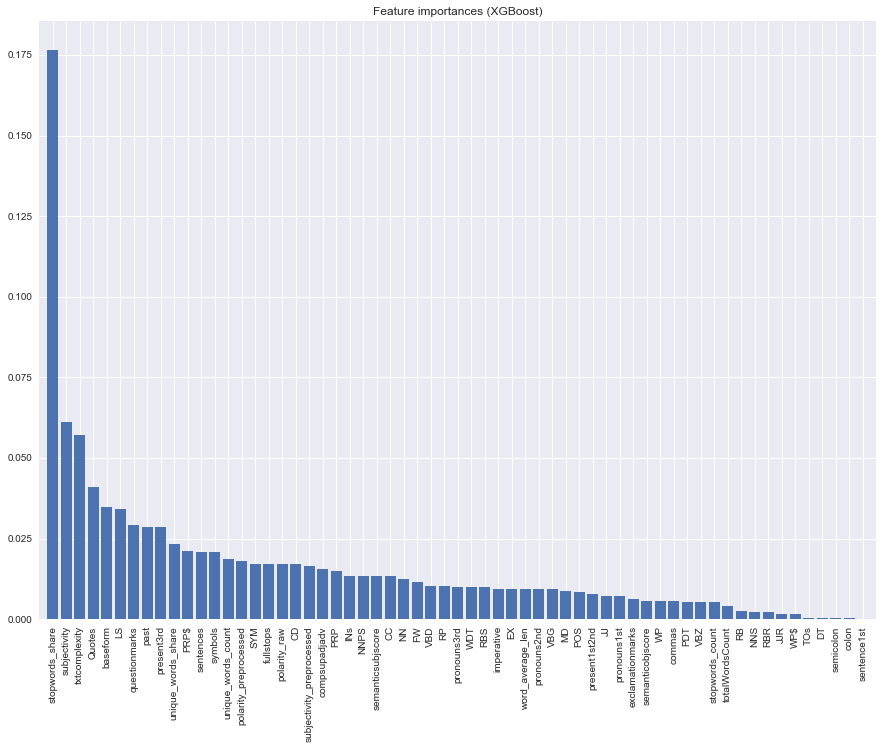

In [57]:
xgb = XGBClassifier(learning_rate=0.03, n_estimators=1000, max_depth=6, min_child_weight=1, subsample=0.8, colsample_bytree=0.95,
                     gamma=3, objective='binary:logistic', seed=13)
xgb.fit(X_train, y_train)
importances = xgb.feature_importances_
indices = np.argsort(np.abs(importances))[::-1]
plt.title("Feature importances (XGBoost)")
plt.bar(np.arange(len(X_train.columns)), importances[indices], align='center')
plt.xticks(range(len(X_train.columns)), X_train.columns[indices[:len(X_train.columns)]], rotation=90)
plt.xlim([-1, len(X_train.columns)])
plt.show()

It seems that feature extraction from texts gave us at least one golden feature - `stopwords_share`. It seems interpretable, because the more "dirty" the article is (the more is the share of the stopwords in it), the more subjective the author is. All other features appeared to be not as golden as the mentioned one. Interesting fact - such seemingly promising extracted features as `subjectivity_preprocessed` didn't provide as useful information as it was supposed to.

# Conclusion

In this project the articles' subjectivity has been predicted based on the data of different nature - texts themselves (preprocessed), TF-IDF matrix and tabular data with the attributes of texts, extracted from them directly and by using Stanford POS Tagger. Exploratory Data Analysis has been performed. It showed that there were no evident words-markers in the texts, but, however, some attributes from the tabular data seemed to distinguish the classes in some good way. Also EDA on tabular data after scaling showed that some of the features were constant or almost constant (hence they were dropped because they presumably contained no useful information), and some of the features were linearly dependent, they were also excluded because it might have caused troubles in training linear models such as Logistic Regression. Interesting finding - it was shown that features `VB` (Frequency of base form verbs) and `past` (Frequency of past tense verbs with 1st and 2nd person pronouns) are linearly dependent, probably because in the majority of times only past tense was used in the article. After that, machine learning models with tuned hyperparameters have been applied to the task. Three different approaches were compared. Firstly, deep learning models such as LSTM and LSTM with an additional convolutional layer in the top of it were applied to the preprocessed texts. The latter was the better, but it was later shown that this approach provided the worst results among the all three. Secondly, different machine learning models were applied to the TF-IDF matrix obtained from the preprocessed texts. Finally, the same machine learning methods (but with different hyperparameters) were applied to the tabular data. In this approaches XGBoost proved to be the best, and tabular data provided the most useful features.

Using the best algorithm (XGBoost on tabular data), it was possible to interpret the results in order to prove that the model didn't overfit on some noise and its predictions are really valuable. It was shown that feature extraction from texts provided a golden feature - share of the stopwords in the total number of words.

As far as the interpretable model was constructed, it can be applied in a real-life scenario. Its final quality was pretty good, but perhaps in order to bring it to production and successfully use it to completely solve the proposed problem of articles subjectivity it may be useful to train it on a larger dataset, so the impact of this model can become very huge and make bets less biased towards the irrelevant information, saving a lot of money for the betters.

Also probably deep learning models may perform better since they are very widely used to solve NLP tasks, but the proposed problem seem complex (there are no evident words-markers), so the patterns are more difficult to be identified, hence the more complex neural networks architectures are required.